In [1]:
# Importation des librairies Python nécessaires à la résolution du problème

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# Chargement des données du dataset
df = pd.read_csv("2016-building-energy-benchmarking.csv")

# Définir l'option pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

In [3]:
# Stats du dataframe
df.describe(include = 'all')

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3376,3376,3376,3376,3376,3376,3360.000000,3376,3376.000000,3376,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3367,3356,3.356000e+03,1679,1679.000000,596,596.000000,119,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3376,0.0,3376,32,3367.000000,3367.000000
unique,NaN,NaN,8,24,3362,3354,1,1,NaN,3268,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,466,56,NaN,50,NaN,44,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise Multifamily,Northgate Plaza,2600 SW Barton St,Seattle,WA,NaN,1625049001,NaN,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,NaN,Parking,NaN,Retail Store,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,NaN,NaN,1460,987,3,4,3376,3376,NaN,8,NaN,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,866,1667,NaN,976,NaN,110,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3263,NaN,3211,23,NaN,NaN
mean,21208.991114,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.949107,NaN,4.439277,NaN,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,NaN,NaN,7.917764e+04,NaN,28444.075817,NaN,11738.675166,NaN,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,NaN,NaN,NaN,119.723971,1.175916
std,12223.757015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.615205,NaN,2.120625,NaN,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,NaN,NaN,2.017034e+05,NaN,54392.917928,NaN,29331.199286,NaN,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,NaN,NaN,NaN,538.832227,1.821452
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,1.000000,NaN,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,NaN,NaN,5.656000e+03,NaN,0.000000,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,3.000000,NaN,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,NaN,NaN,2.509475e+04,NaN,5000.000000,NaN,2239.000000,NaN,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,9.495000,0.210000
50%,23112.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,4.000000,NaN,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,NaN,NaN,3.989400e+04,NaN,10664.000000,NaN,5043.000000,NaN,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,NaN,NaN,NaN,33.920000,0.610000
75%,25994.250000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98122.000000,NaN,7.000000,NaN,47.657115

In [4]:
#Doublon
df.duplicated().sum()

0

### Définition d'un nouveau dataframe avec les données nécessaires

In [5]:
# Définition du dataframe avec uniquement les bâtiments non destinés à l’habitation à partir de relevés de la ville seattle
no_resid = df
resid = no_resid[no_resid['BuildingType'].isin(['Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)'])]
no_resid.drop(resid.index, inplace=True)
no_resid

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

In [6]:
# Stats du dataframe
no_resid.describe(include = 'all')

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,1668.000000,1668.0,1668,1668,1668,1668,1668,1668,1652.000000,1668,1668.000000,1668,1668.000000,1668.000000,1668.000000,1666.000000,1668.000000,1.668000e+03,1668.000000,1.668000e+03,1666,1662,1.662000e+03,855,855.000000,353,353.00000,98,1094.000000,1665.000000,1665.000000,1666.000000,1666.000000,1.666000e+03,1.665000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1668,0.0,1668,17,1666.000000,1666.000000
unique,NaN,NaN,5,22,1664,1647,1,1,NaN,1587,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373,56,NaN,47,NaN,39,NaN,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,NaN,NaN,NonResidential,Small- and Mid-Sized Office,South Park,2600 SW Barton St,Seattle,WA,NaN,1625049001,NaN,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Office,Office,NaN,Parking,NaN,Office,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,NaN,NaN,1460,292,2,4,1668,1668,NaN,8,NaN,361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138,497,NaN,336,NaN,49,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1580,NaN,1548,15,NaN,NaN
mean,16336.346523,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.819613,NaN,4.356715,NaN,47.616054,-122.332908,1961.913669,1.168667,4.121103,1.188427e+05,12897.979017,1.059447e+05,NaN,NaN,9.876469e+04,NaN,36804.160581,NaN,14923.13994,NaN,65.449726,72.158799,74.568529,175.829892,178.090876,8.437933e+06,8.064790e+06,5.125726e+05,1.712630e+06,5.843493e+06,1.970845e+04,1.970845e+06,NaN,NaN,NaN,NaN,184.973301,1.607845
std,13835.292512,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.430353,NaN,2.191048,NaN,0.048168,0.024580,32.741755,2.931409,6.563407,2.973622e+05,42274.511185,2.842116e+05,NaN,NaN,2.767111e+05,NaN,69845.261024,NaN,36790.55656,NaN,28.492928,74.048129,75.028403,185.932121,185.918749,3.024380e+07,2.203878e+07,5.513944e+06,6.095172e+06,2.079673e+07,9.370814e+04,9.370814e+06,NaN,NaN,NaN,NaN,751.976001,2.336882
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,1.000000,NaN,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,NaN,NaN,5.656000e+03,NaN,0.000000,NaN,0.00000,NaN,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,-0.800000,-0.020000
25%,582.750000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,2.000000,NaN,47.585458,-122.343280,1930.000000,1.000000,1.000000,2.947775e+04,0.000000,2.847525e+04,NaN,NaN,2.552750e+04,NaN,5350.000000,NaN,2663.00000,NaN,48.000000,33.700001,35.400002,76.450001,79.325003,1.229291e+06,1.294615e+06,0.000000e+00,2.114083e+05,7.213255e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,19.967500,0.350000
50%,21143.500000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98109.000000,NaN,4.000000,NaN,47.612340,-122.332935,1965.000000,1.000000,2.000000,4.928950e+04,0.000000,4.739150e+04,NaN,NaN,4.377050e+04,NaN,12000.000000,NaN,5931.00000,NaN,73.000000,51.900002,53.900002,130.949997,134.150002,2.554947e+06,2.685146e+06,0.000000e+00,4.724153e+05,1.611881e+06,4.982630e+03,4.982630e+05,NaN,NaN,NaN,NaN,49.580000,0.880000
75%,24602.250000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98125.000000,NaN,7.000000,NaN,47.649675,-122.321675,1989.000000,1.000000,4.0000

In [7]:
for col in no_resid.select_dtypes('object'):
    print(f'{col :-<20} {no_resid[col].unique()}')

BuildingType-------- ['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']
PrimaryPropertyType- ['Hotel' 'Other' 'Mixed Use Property' 'K-12 School' 'University'
 'Small- and Mid-Sized Office' 'Self-Storage Facility' 'Warehouse'
 'Large Office' 'Senior Care Community' 'Medical Office' 'Retail Store'
 'Hospital' 'Residence Hall' 'Distribution Center' 'Worship Facility'
 'Supermarket / Grocery Store' 'Laboratory' 'Refrigerated Warehouse'
 'Restaurant' 'Low-Rise Multifamily' 'Office']
PropertyName-------- ['Mayflower park hotel' 'Paramount Hotel' '5673-The Westin Seattle' ...
 'Queen Anne Pool' 'South Park Community Center'
 'Van Asselt Community Center']
Address------------- ['405 Olive way' '724 Pine street' '1900 5th Avenue' ... '1920 1st Ave W'
 '8319 8th Ave S' '2820 S Myrtle St']
City---------------- ['Seattle']
State--------------- ['WA']
TaxParcelIdentificationNumber ['0659000030' '0659000220' '0659000475' ... '3558300000' '7883603155'
 '78570020

In [8]:
# Suppression de colonnes inutiles
no_resid = no_resid.drop(['DataYear', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Latitude', 'Longitude', 'ListOfAllPropertyUseTypes', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'Electricity(kWh)', 'NaturalGas(therms)', 'Comments'], axis=1)
no_resid

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,3.946027e+06,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,2,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,3.242851e+06,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,3,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,756493.0,NaN,NaN,NaN,NaN,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,4.952666e+07,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,5,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,2.768924e+06,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,8,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,5.368607e+06,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1,12294,0,12294,Office,12294.0,NaN,NaN,NaN,NaN,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,5.242709e+05,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1,16000,0,16000,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,3.965461e+05,5.537300e+05,False,Compliant,NaN,32.17,2.01
3373,50224,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,0,13157,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,1.792159e+06,3.973739e+06,False,Compliant,NaN,223.54,16.99
3374,50225,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1,14101,0,14101,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,3.488702e+05,3.706010e+05,False,Compliant,NaN,22.11,1.57


In [9]:
no_resid.isna().sum()

OSEBuildingID                         0
BuildingType                          0
PrimaryPropertyType                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     2
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType                6
LargestPropertyUseTypeGFA             6
SecondLargestPropertyUseType        813
SecondLargestPropertyUseTypeGFA     813
ThirdLargestPropertyUseType        1315
ThirdLargestPropertyUseTypeGFA     1315
SiteEUI(kBtu/sf)                      3
SiteEUIWN(kBtu/sf)                    3
SourceEUI(kBtu/sf)                    2
SourceEUIWN(kBtu/sf)                  2
SiteEnergyUse(kBtu)                   2
SiteEnergyUseWN(kBtu)                 3
SteamUse(kBtu)                        2
Electricity(kBtu)                     2
NaturalGas(kBtu)                      2


###  Nettoyage

In [10]:
no_resid['SecondLargestPropertyUseType'].fillna('Inconnu', inplace=True)
no_resid['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
no_resid['ThirdLargestPropertyUseType'].fillna('Inconnu', inplace=True)
no_resid['ThirdLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
no_resid.isna().sum()

OSEBuildingID                         0
BuildingType                          0
PrimaryPropertyType                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     2
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType                6
LargestPropertyUseTypeGFA             6
SecondLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType           0
ThirdLargestPropertyUseTypeGFA        0
SiteEUI(kBtu/sf)                      3
SiteEUIWN(kBtu/sf)                    3
SourceEUI(kBtu/sf)                    2
SourceEUIWN(kBtu/sf)                  2
SiteEnergyUse(kBtu)                   2
SiteEnergyUseWN(kBtu)                 3
SteamUse(kBtu)                        2
Electricity(kBtu)                     2
NaturalGas(kBtu)                      2


In [11]:
ind = no_resid[no_resid["GHGEmissionsIntensity"].isna()]
ind

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
578,773,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,1924,NaN,4,63150,0,63150,NaN,NaN,Inconnu,0.0,Inconnu,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN,NaN
2670,26532,NonResidential,Mixed Use Property,NORTHEAST,1928,NaN,2,20760,0,20760,NaN,NaN,Inconnu,0.0,Inconnu,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN,NaN


In [12]:
# Supprimer les lignes comptant bcp de Nan
ind = no_resid[no_resid["GHGEmissionsIntensity"].isna()].index
no_resid.drop(ind, inplace = True)
ind2 = no_resid[no_resid["SiteEUI(kBtu/sf)"].isna()].index 
no_resid.drop(ind2, inplace = True)

In [13]:
miss = no_resid[no_resid["SiteEnergyUseWN(kBtu)"].isna()] 
miss

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
563,757,NonResidential,Large Office,DOWNTOWN,1979,1.0,7,131143,87160,43983,Office,120248.0,Retail Store,10853.0,Inconnu,0.0,39.5,NaN,128.0,0.0,5177270.5,NaN,0.0,4871126.0,1416041.0,False,Compliant,NaN,109.16,0.83


In [14]:
no_resid.loc[563] = no_resid.loc[563].fillna(method='ffill')

In [15]:
miss = no_resid[no_resid["LargestPropertyUseType"].isna()]   
miss

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
353,496,NonResidential,Self-Storage Facility,BALLARD,1946,2.0,2,111445,0,111445,NaN,NaN,Inconnu,0.0,Inconnu,0.0,47.799999,51.000000,103.000000,106.400002,5.697472e+06,6.076957e+06,0.0,3007514.0,2689958.0,False,Compliant,NaN,163.83,1.47
1147,21103,NonResidential,Hotel,DOWNTOWN,1910,1.0,8,61721,0,61721,NaN,NaN,Inconnu,0.0,Inconnu,0.0,52.200001,53.500000,150.399994,154.399994,2.897080e+06,2.968430e+06,0.0,2534592.0,362488.0,False,Compliant,NaN,36.92,0.60
2414,25568,NonResidential,Small- and Mid-Sized Office,LAKE UNION,2008,1.0,4,48350,0,48350,NaN,NaN,Inconnu,0.0,Inconnu,0.0,72.199997,74.699997,226.600006,234.600006,3.168131e+06,3.280956e+06,0.0,3168131.0,0.0,False,Compliant,NaN,22.09,0.46
2459,25711,NonResidential,Restaurant,DOWNTOWN,1913,1.0,3,28800,0,28800,NaN,NaN,Inconnu,0.0,Inconnu,0.0,31.200001,32.500000,62.000000,62.799999,8.999242e+05,9.358332e+05,0.0,402907.0,497017.0,False,Compliant,NaN,29.21,1.01


In [16]:
test = no_resid[no_resid["NumberofBuildings"] == 2]
test = test[test["NumberofFloors"] == 2]
test = test[test["PrimaryPropertyType"] == 'Self-Storage Facility'] 
test

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
353,496,NonResidential,Self-Storage Facility,BALLARD,1946,2.0,2,111445,0,111445,NaN,NaN,Inconnu,0.0,Inconnu,0.0,47.799999,51.000000,103.0,106.400002,5.697472e+06,6.076957e+06,0.0,3007514.0,2689958.0,False,Compliant,NaN,163.83,1.47
1059,20686,NonResidential,Self-Storage Facility,NORTH,1988,2.0,2,50368,0,50368,Self-Storage Facility,50369.0,Inconnu,0.0,Inconnu,0.0,15.000000,17.799999,26.0,29.200001,7.532752e+05,8.978229e+05,0.0,247692.0,505583.0,False,Compliant,NaN,28.58,0.57
1658,23020,NonResidential,Self-Storage Facility,NORTH,1977,2.0,2,33344,0,33344,Self-Storage Facility,31360.0,Office,984.0,Parking,0.0,3.800000,4.000000,12.0,12.600000,1.237672e+05,1.294669e+05,0.0,123767.0,0.0,False,Compliant,NaN,0.86,0.03


In [17]:
no_resid.loc[353, 'LargestPropertyUseType'] = no_resid.loc[353, 'PrimaryPropertyType']
no_resid.loc[1147, 'LargestPropertyUseType'] = no_resid.loc[1147, 'PrimaryPropertyType']
no_resid.loc[2414, 'LargestPropertyUseType'] = 'Office'
no_resid.loc[2459, 'LargestPropertyUseType'] = no_resid.loc[2459, 'PrimaryPropertyType']

In [18]:
# Liste des index des lignes avec des valeurs manquantes dans la colonne "LargestPropertyUseTypeGFA"
ind3 = no_resid[no_resid["LargestPropertyUseTypeGFA"].isna()].index

# Parcourir les index et remplacer les valeurs manquantes
for index in ind3:
    no_resid.loc[index, 'LargestPropertyUseTypeGFA'] = no_resid.loc[index, 'PropertyGFABuilding(s)']

In [19]:
no_resid["NumberofBuildings"].replace(0, 1, inplace=True)
no_resid

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,88434.0,Inconnu,0.0,Inconnu,0.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,3.946027e+06,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,2,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,3.242851e+06,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,3,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,756493.0,Inconnu,0.0,Inconnu,0.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,4.952666e+07,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,5,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,61320.0,Inconnu,0.0,Inconnu,0.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,2.768924e+06,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,8,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,5.368607e+06,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1,12294,0,12294,Office,12294.0,Inconnu,0.0,Inconnu,0.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,5.242709e+05,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1,16000,0,16000,Other - Recreation,16000.0,Inconnu,0.0,Inconnu,0.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,3.965461e+05,5.537300e+05,False,Compliant,NaN,32.17,2.01
3373,50224,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,0,13157,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,1.792159e+06,3.973739e+06,False,Compliant,NaN,223.54,16.99
3374,50225,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1,14101,0,14101,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,3.488702e+05,3.706010e+05,False,Compliant,NaN,22.11,1.57


In [20]:
no_resid.isna().sum()

OSEBuildingID                         0
BuildingType                          0
PrimaryPropertyType                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType                0
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType           0
ThirdLargestPropertyUseTypeGFA        0
SiteEUI(kBtu/sf)                      0
SiteEUIWN(kBtu/sf)                    0
SourceEUI(kBtu/sf)                    0
SourceEUIWN(kBtu/sf)                  0
SiteEnergyUse(kBtu)                   0
SiteEnergyUseWN(kBtu)                 0
SteamUse(kBtu)                        0
Electricity(kBtu)                     0
NaturalGas(kBtu)                      0


In [21]:
no_resid

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,88434.0,Inconnu,0.0,Inconnu,0.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,3.946027e+06,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,2,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,3.242851e+06,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,3,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,756493.0,Inconnu,0.0,Inconnu,0.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,4.952666e+07,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,5,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,61320.0,Inconnu,0.0,Inconnu,0.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,2.768924e+06,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,8,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,5.368607e+06,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1,12294,0,12294,Office,12294.0,Inconnu,0.0,Inconnu,0.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,5.242709e+05,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1,16000,0,16000,Other - Recreation,16000.0,Inconnu,0.0,Inconnu,0.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,3.965461e+05,5.537300e+05,False,Compliant,NaN,32.17,2.01
3373,50224,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,0,13157,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,1.792159e+06,3.973739e+06,False,Compliant,NaN,223.54,16.99
3374,50225,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1,14101,0,14101,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,3.488702e+05,3.706010e+05,False,Compliant,NaN,22.11,1.57


In [22]:
test = 187.399994 / 0.980519
test

191.1232663517994

In [23]:
no_resid.isna().sum()

OSEBuildingID                         0
BuildingType                          0
PrimaryPropertyType                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType                0
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType           0
ThirdLargestPropertyUseTypeGFA        0
SiteEUI(kBtu/sf)                      0
SiteEUIWN(kBtu/sf)                    0
SourceEUI(kBtu/sf)                    0
SourceEUIWN(kBtu/sf)                  0
SiteEnergyUse(kBtu)                   0
SiteEnergyUseWN(kBtu)                 0
SteamUse(kBtu)                        0
Electricity(kBtu)                     0
NaturalGas(kBtu)                      0


In [24]:
no_resid.tail(50)

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3254,49918,Nonresidential COS,Other,SOUTHEAST,2013,1.0,1,53775,0,53775,Other - Recreation,35361.0,Fitness Center/Health Club/Gym,12689.0,Office,2110.000000,224.899994,231.399994,391.899994,398.700012,1.209582e+07,1.244261e+07,0.0,4.007401e+06,8.088416e+06,False,Compliant,NaN,457.51,8.51
3259,49924,NonResidential,Small- and Mid-Sized Office,EAST,1912,1.0,2,64820,0,64820,Office,37668.0,Movie Theater,11500.0,Vocational School,10000.000000,38.400002,39.400002,110.300003,111.400002,2.274297e+06,2.332889e+06,0.0,1.980767e+06,2.935290e+05,False,Compliant,NaN,29.40,0.45
3260,49925,NonResidential,University,EAST,1993,1.0,2,99765,0,99765,College/University,99765.0,Inconnu,0.0,Inconnu,0.000000,31.900000,33.799999,76.599998,78.599998,3.185005e+06,3.372444e+06,0.0,2.055974e+06,1.129031e+06,False,Compliant,NaN,74.30,0.74
3261,49926,NonResidential,University,EAST,1925,1.0,3,428347,0,428347,College/University,472384.0,Inconnu,0.0,Inconnu,0.000000,78.400002,82.500000,183.699997,187.300003,3.702218e+07,3.897711e+07,13556219.0,2.193062e+07,1.535341e+06,False,Compliant,NaN,1280.81,2.99
3264,49940,NonResidential,Hospital,EAST,1920,1.0,8,374466,0,374466,Hospital (General Medical & Surgical),1010135.0,Inconnu,0.0,Inconnu,0.000000,162.300003,165.500000,367.899994,369.399994,1.639460e+08,1.672071e+08,73885472.0,9.006050e+07,0.000000e+00,False,Compliant,NaN,6330.91,16.91
3267,49945,NonResidential,Senior Care Community,DOWNTOWN,1989,1.0,3,197395,156000,41395,Senior Care Community,38800.0,Other - Public Services,3650.0,Office,586.000000,62.799999,65.199997,156.399994,158.899994,2.737534e+06,2.842128e+06,0.0,1.888063e+06,8.494710e+05,False,Compliant,NaN,58.28,0.30
3268,49946,NonResidential,Supermarket / Grocery Store,BALLARD,2010,1.0,8,41198,0,41198,Supermarket/Grocery Store,41198.0,Inconnu,0.0,Inconnu,0.000000,188.600006,189.000000,560.799988,561.299988,7.768058e+06,7.785876e+06,0.0,7.151865e+06,6.161920e+05,False,Compliant,NaN,82.58,2.00
3270,49958,Nonresidential COS,Other,GREATER DUWAMISH,2014,1.0,1,20993,0,20993,"Repair Services (Vehicle, Shoe, Locksmith, etc)",20983.0,Inconnu,0.0,Inconnu,0.000000,44.000000,45.799999,125.400002,129.699997,9.238128e+05,9.616286e+05,0.0,7.958290e+05,9.891200e+04,False,Compliant,NaN,10.80,0.51
3273,49966,NonResidential,Other,SOUTHEAST,2009,1.0,0,40265,0,40265,Pre-school/Daycare,40265.0,Inconnu,0.0,Inconnu,0.000000,53.599998,56.200001,127.500000,130.199997,2.159170e+06,2.261076e+06,0.0,1.371703e+06,7.874670e+05,False,Compliant,NaN,51.39,1.28
3274,49967,Campus,University,NORTHEAST,1900,111.0,0,9320156,0,9320156,College/University,9320156.0,Inconnu,0.0,Inconnu,0.000000,93.800003,0.000000,246.600006,0.000000,8.739237e+08,0.000000e+00,84985240.0,6.570744e+08,0.000000e+00,False,Compliant,NaN,11140.56,1.20


In [25]:
type_use = no_resid.groupby(["LargestPropertyUseType"]).count()
type_use

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
LargestPropertyUseType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adult Education,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2
Automobile Dealership,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,5,5
Bank Branch,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4
College/University,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,0,24,24
Courthouse,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
Data Center,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3
Distribution Center,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,0,54,54
Financial Office,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4
Fire Station,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1


In [26]:
type_use = no_resid.groupby(["PrimaryPropertyType"]).count()
type_use

,OSEBuildingID,BuildingType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
PrimaryPropertyType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Distribution Center,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,0,53,53
Hospital,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,0,10,10
Hotel,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,1,76,76
K-12 School,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,2,139,139
Laboratory,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,0,10,10
Large Office,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,4,173,173
Low-Rise Multifamily,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,3
Medical Office,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,0,39,39
Mixed Use Property,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,0,113,113


#### Analyse bivariée de la consommation d'énergie annuelle (site divisée par sa surface au plancher)

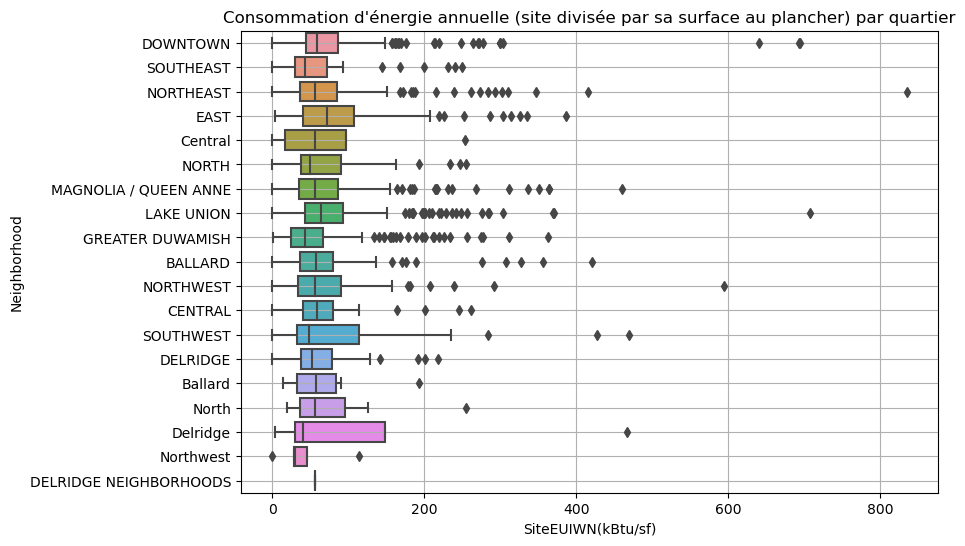

In [27]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='SiteEUIWN(kBtu/sf)',y="Neighborhood",data=no_resid, showfliers=True)
plt.title("Consommation d'énergie annuelle (site divisée par sa surface au plancher) par quartier")
plt.grid()
plt.show()

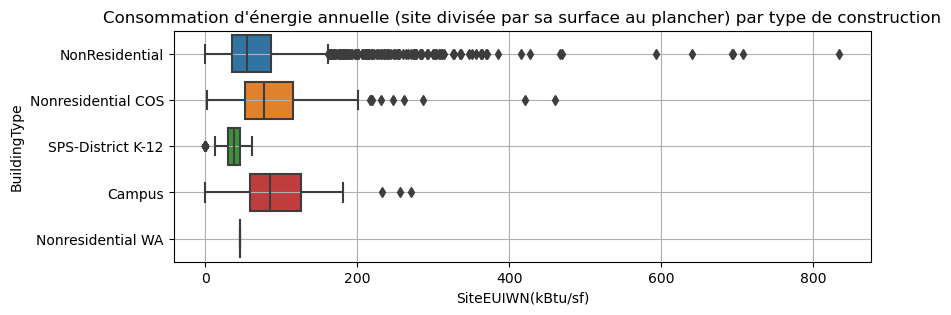

In [28]:
fig = plt.figure(1, figsize=(9,3))
sns.boxplot(x='SiteEUIWN(kBtu/sf)',y="BuildingType",data=no_resid, showfliers=True)
plt.title("Consommation d'énergie annuelle (site divisée par sa surface au plancher) par type de construction")
plt.grid()
plt.show()

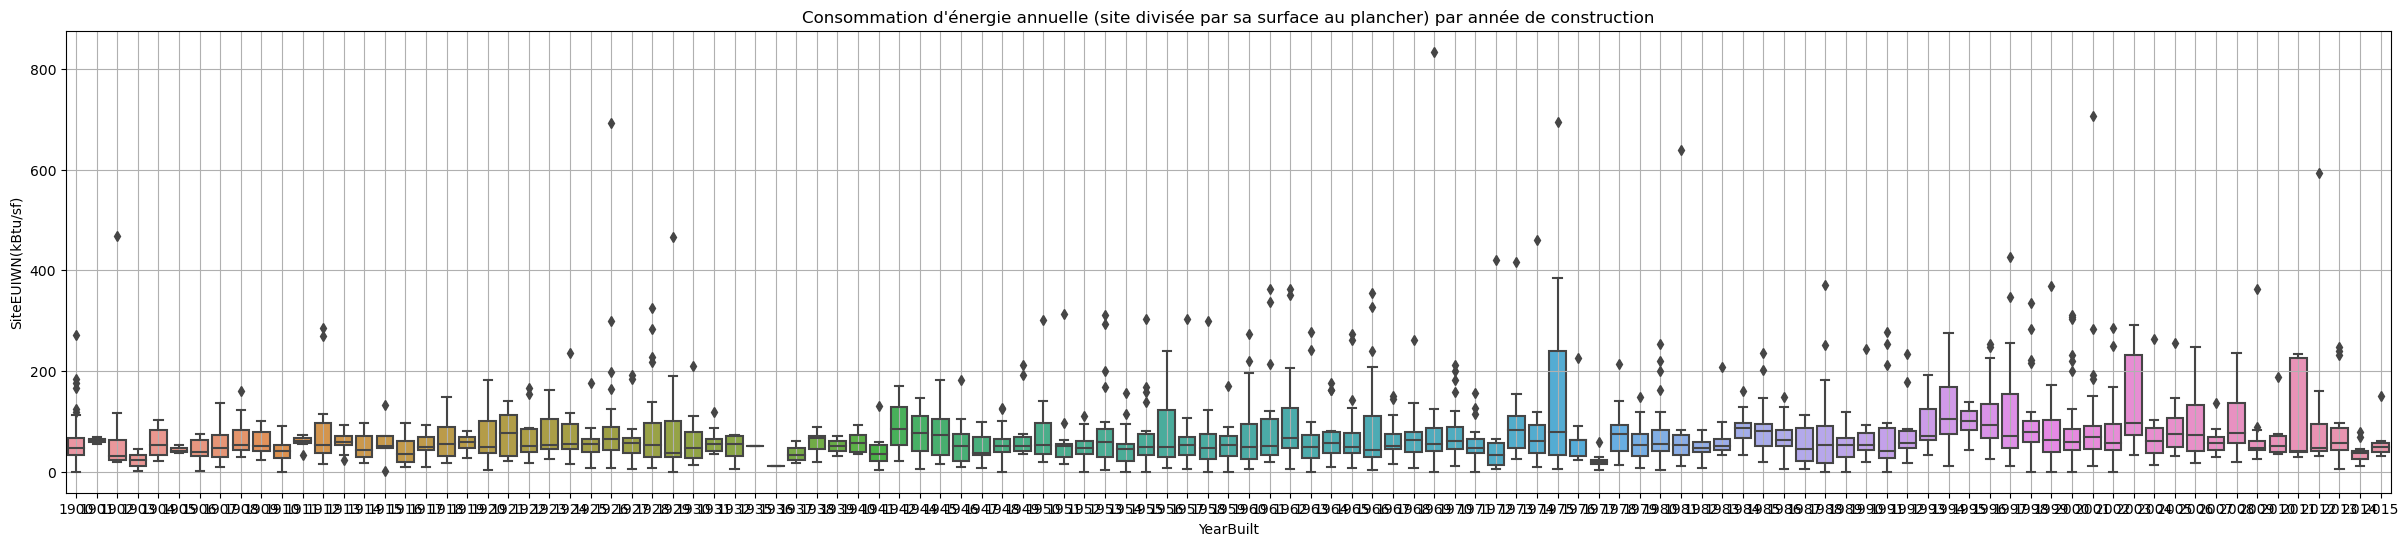

In [29]:
fig = plt.figure(1, figsize=(30,6))
sns.boxplot(x="YearBuilt",y='SiteEUIWN(kBtu/sf)',data=no_resid, showfliers=True)
plt.title("Consommation d'énergie annuelle (site divisée par sa surface au plancher) par année de construction")
plt.grid()
plt.show()

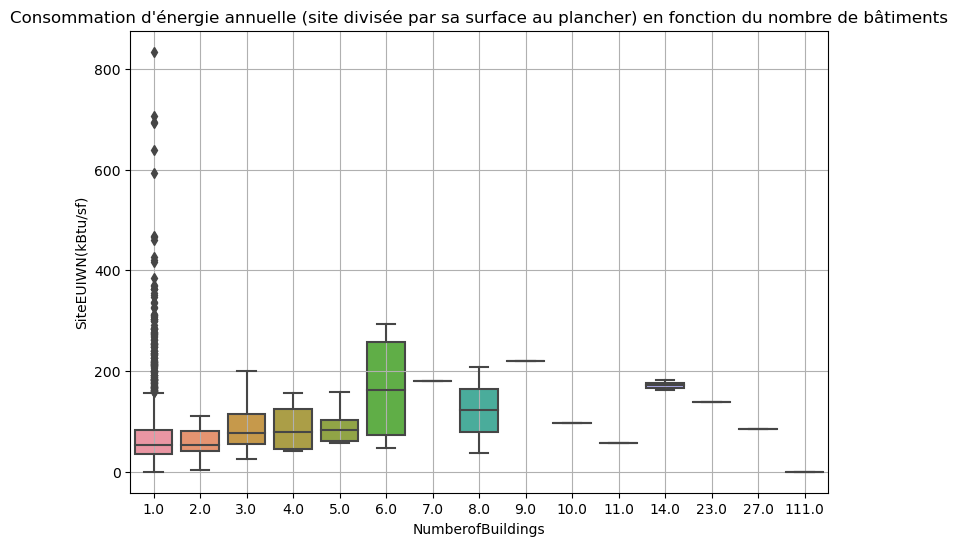

In [30]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='NumberofBuildings',y='SiteEUIWN(kBtu/sf)',data=no_resid, showfliers=True)
plt.title("Consommation d'énergie annuelle (site divisée par sa surface au plancher) en fonction du nombre de bâtiments")
plt.grid()
plt.show()

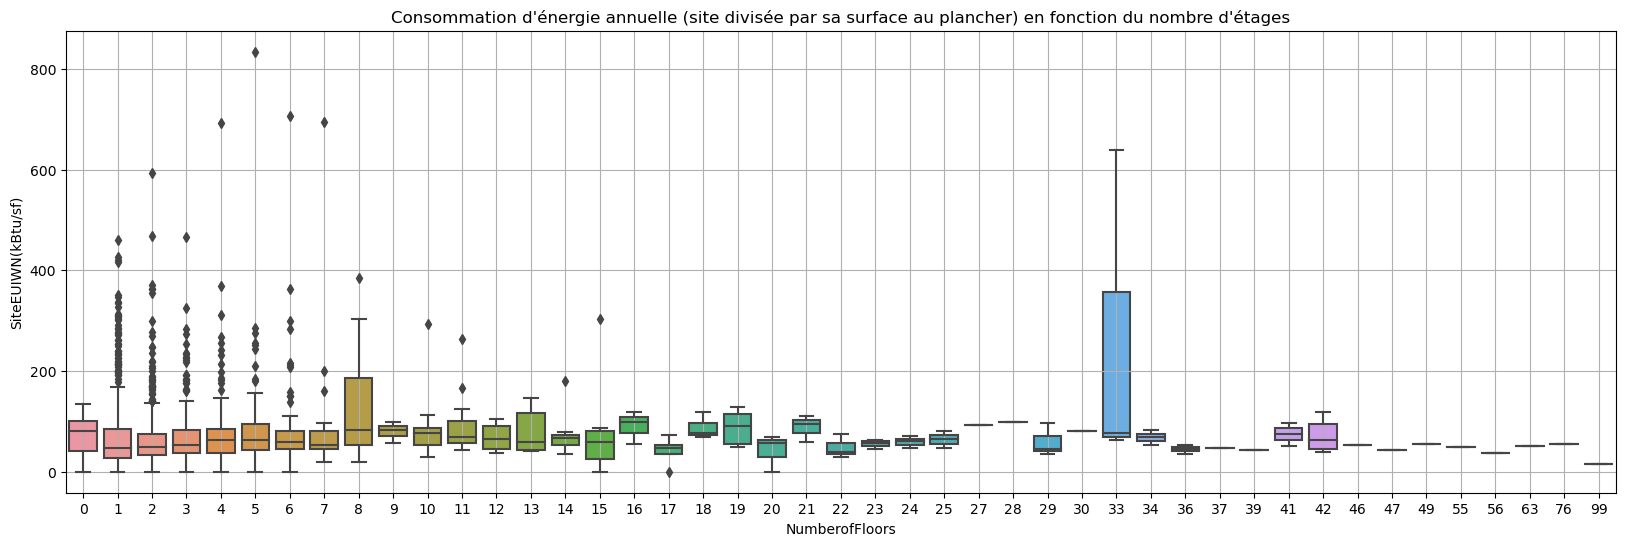

In [31]:
fig = plt.figure(1, figsize=(20,6))
sns.boxplot(x='NumberofFloors',y='SiteEUIWN(kBtu/sf)',data=no_resid, showfliers=True)
plt.title("Consommation d'énergie annuelle (site divisée par sa surface au plancher) en fonction du nombre d'étages")
plt.grid()
plt.show()

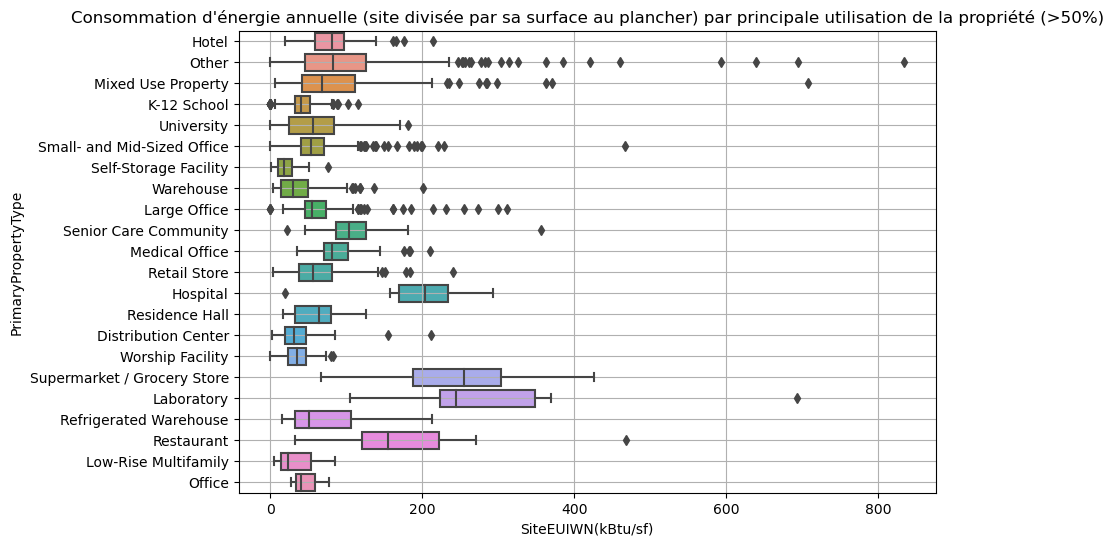

In [32]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='SiteEUIWN(kBtu/sf)',y="PrimaryPropertyType",data=no_resid, showfliers=True)
plt.title("Consommation d'énergie annuelle (site divisée par sa surface au plancher) par principale utilisation de la propriété (>50%)")
plt.grid()
plt.show()

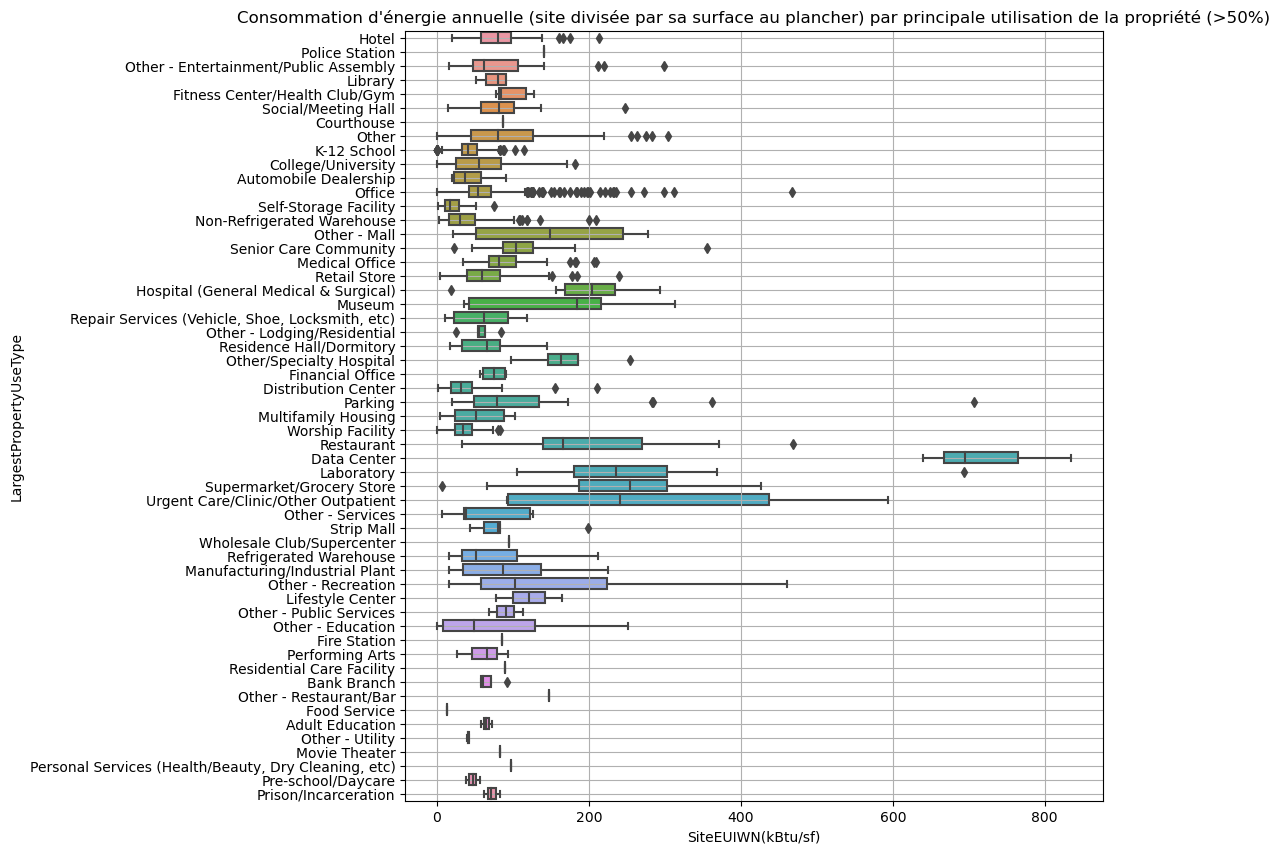

In [33]:
fig = plt.figure(1, figsize=(9,10))
sns.boxplot(x='SiteEUIWN(kBtu/sf)',y="LargestPropertyUseType",data=no_resid, showfliers=True)
plt.title("Consommation d'énergie annuelle (site divisée par sa surface au plancher) par principale utilisation de la propriété (>50%)")
plt.grid()
plt.show()

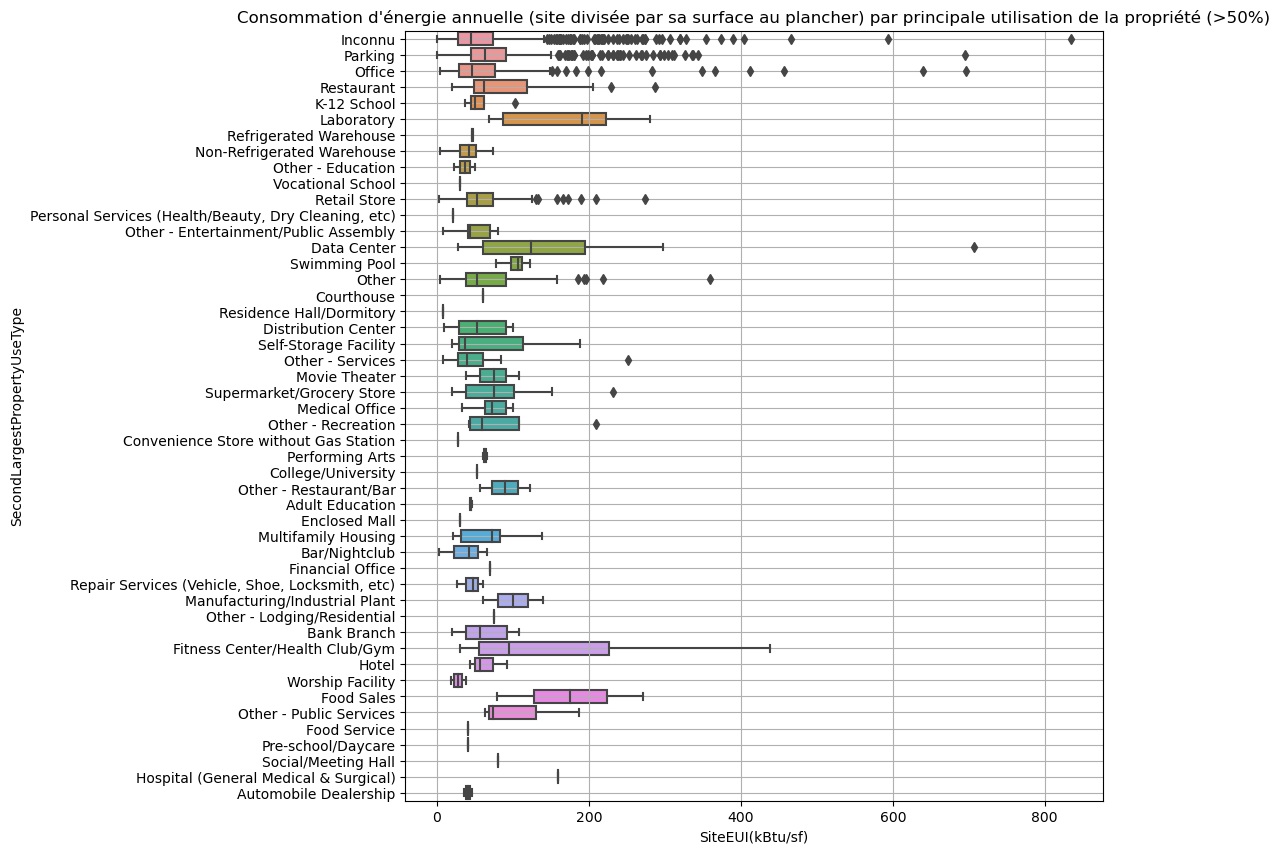

In [34]:
fig = plt.figure(1, figsize=(9,10))
sns.boxplot(x='SiteEUI(kBtu/sf)',y="SecondLargestPropertyUseType",data=no_resid, showfliers=True)
plt.title("Consommation d'énergie annuelle (site divisée par sa surface au plancher) par principale utilisation de la propriété (>50%)")
plt.grid()
plt.show()

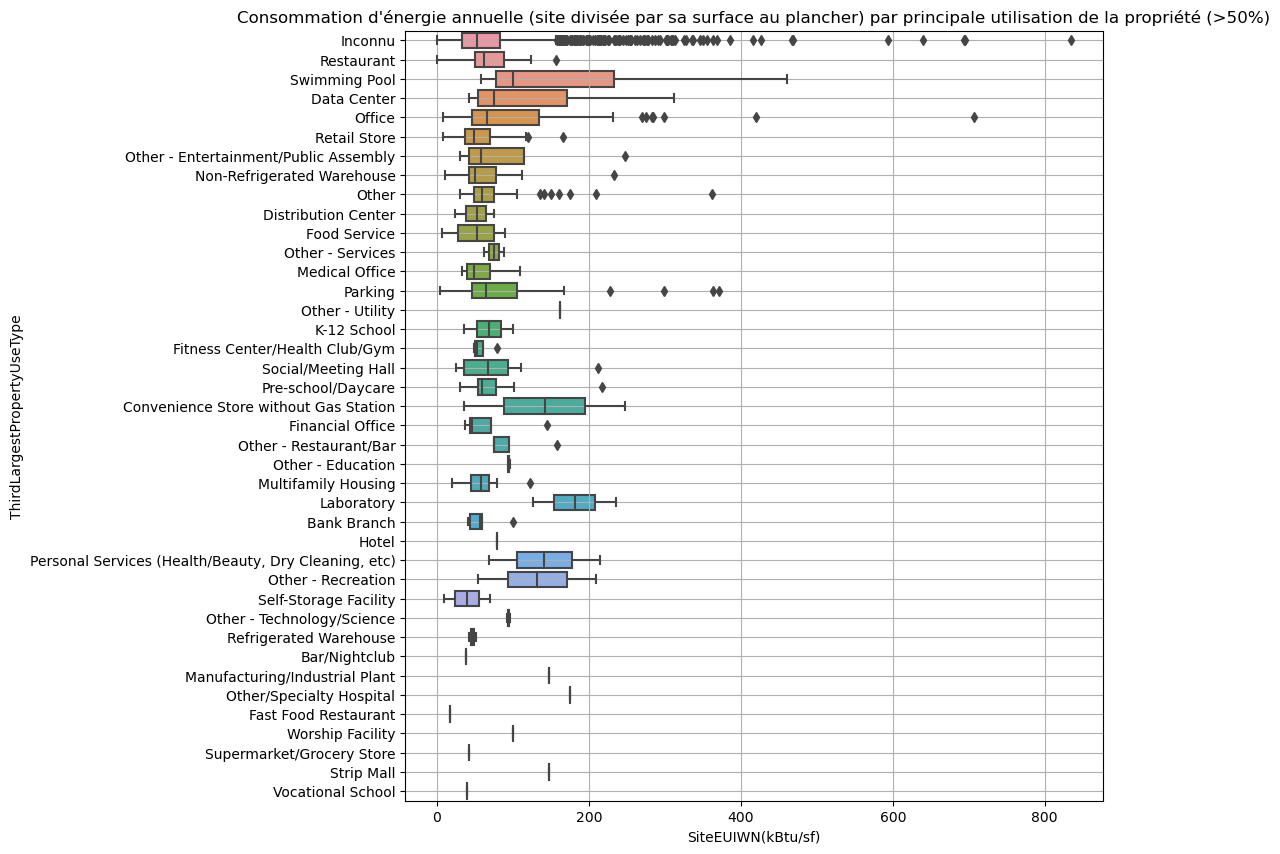

In [35]:
fig = plt.figure(1, figsize=(9,10))
sns.boxplot(x='SiteEUIWN(kBtu/sf)',y="ThirdLargestPropertyUseType",data=no_resid, showfliers=True)
plt.title("Consommation d'énergie annuelle (site divisée par sa surface au plancher) par principale utilisation de la propriété (>50%)")
plt.grid()
plt.show()

### Analyse bivariée des émissions de CO2 (site divisée par sa surface au plancher) pour l'année 2016

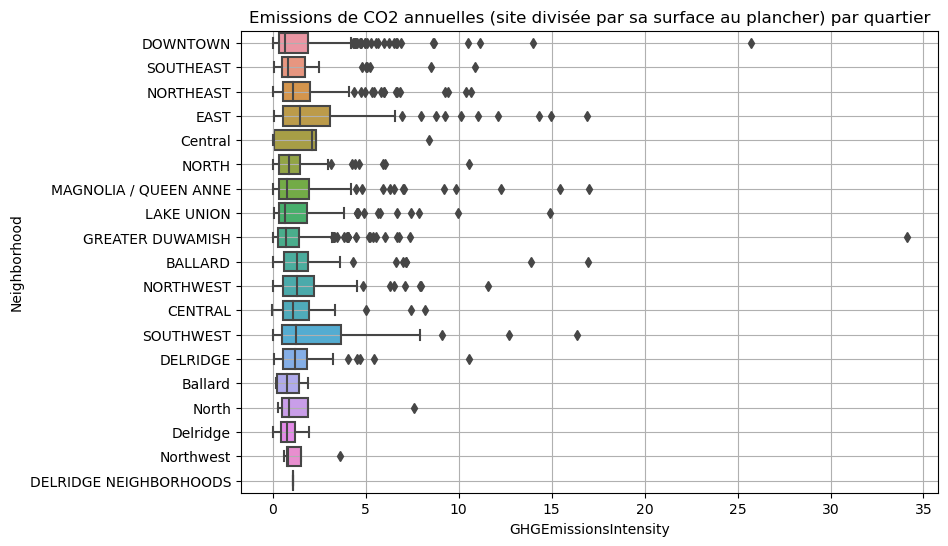

In [36]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='GHGEmissionsIntensity',y="Neighborhood",data=no_resid, showfliers=True)
plt.title("Emissions de CO2 annuelles (site divisée par sa surface au plancher) par quartier")
plt.grid()
plt.show()

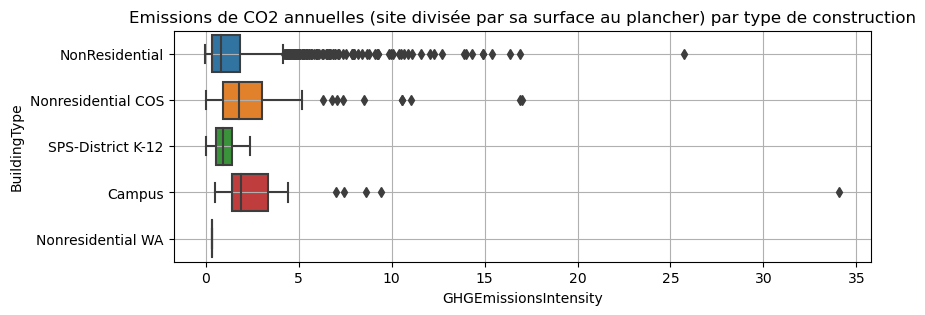

In [37]:
fig = plt.figure(1, figsize=(9,3))
sns.boxplot(x='GHGEmissionsIntensity',y="BuildingType",data=no_resid, showfliers=True)
plt.title("Emissions de CO2 annuelles (site divisée par sa surface au plancher) par type de construction")
plt.grid()
plt.show()

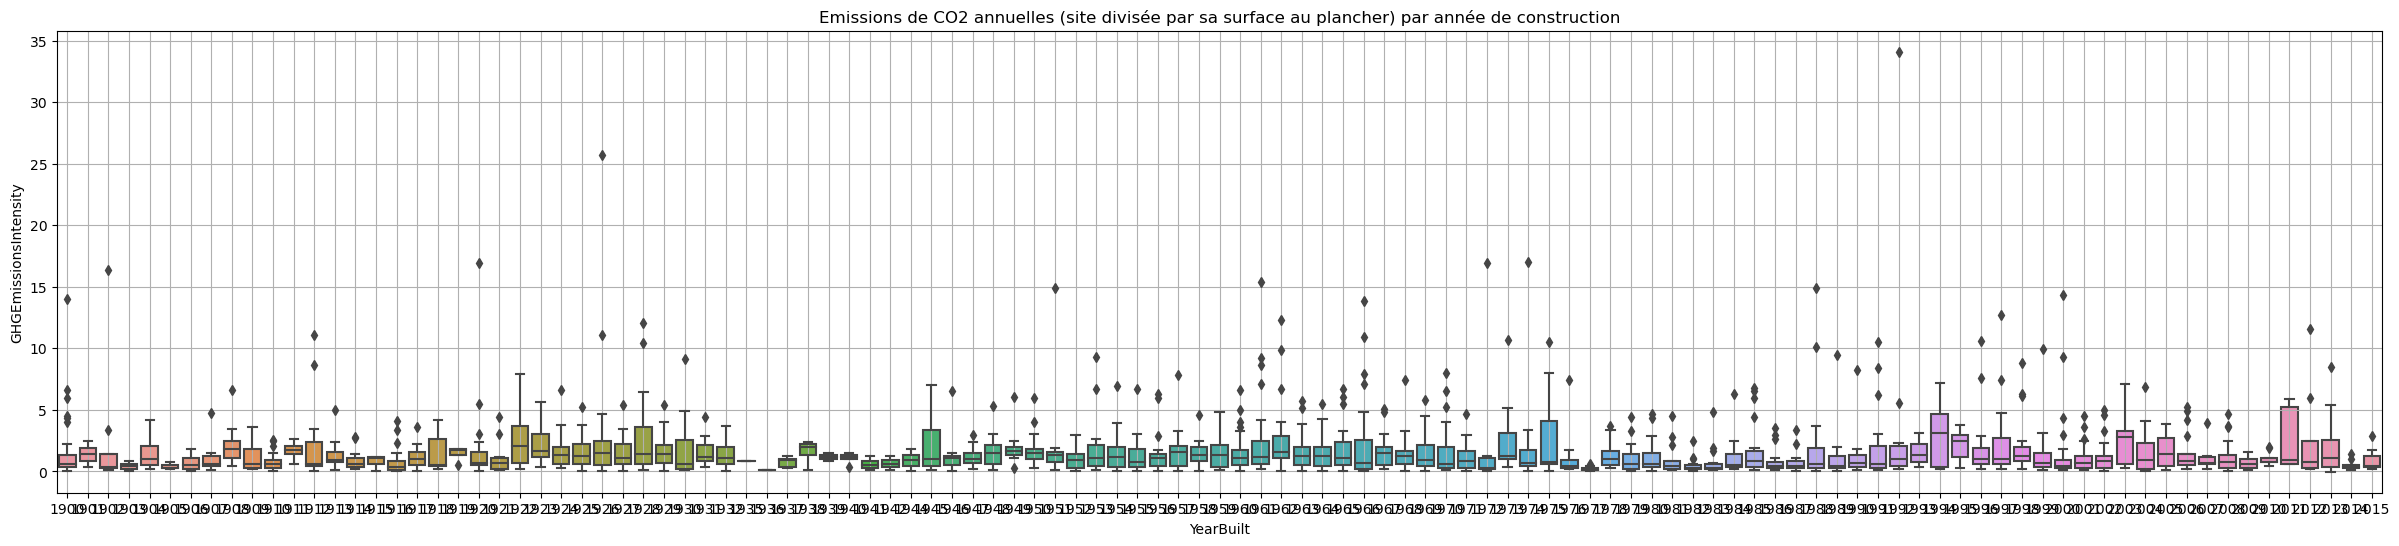

In [38]:
fig = plt.figure(1, figsize=(30,6))
sns.boxplot(x="YearBuilt",y='GHGEmissionsIntensity',data=no_resid, showfliers=True)
plt.title("Emissions de CO2 annuelles (site divisée par sa surface au plancher) par année de construction")
plt.grid()
plt.show()

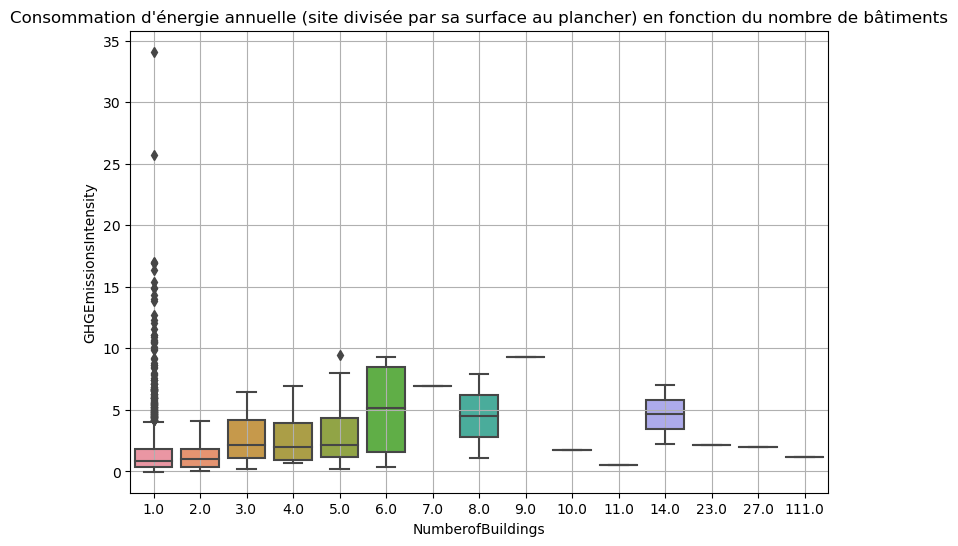

In [39]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='NumberofBuildings',y='GHGEmissionsIntensity',data=no_resid, showfliers=True)
plt.title("Consommation d'énergie annuelle (site divisée par sa surface au plancher) en fonction du nombre de bâtiments")
plt.grid()
plt.show()

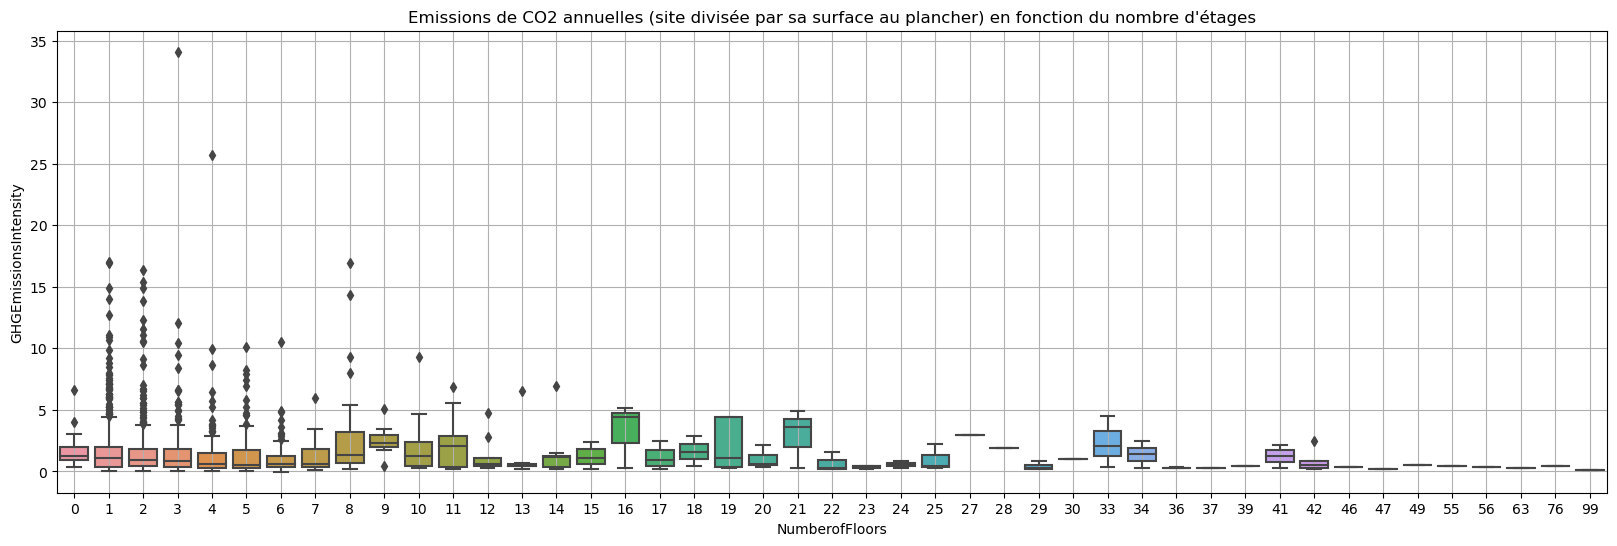

In [40]:
fig = plt.figure(1, figsize=(20,6))
sns.boxplot(x='NumberofFloors',y='GHGEmissionsIntensity',data=no_resid, showfliers=True)
plt.title("Emissions de CO2 annuelles (site divisée par sa surface au plancher) en fonction du nombre d'étages")
plt.grid()
plt.show()

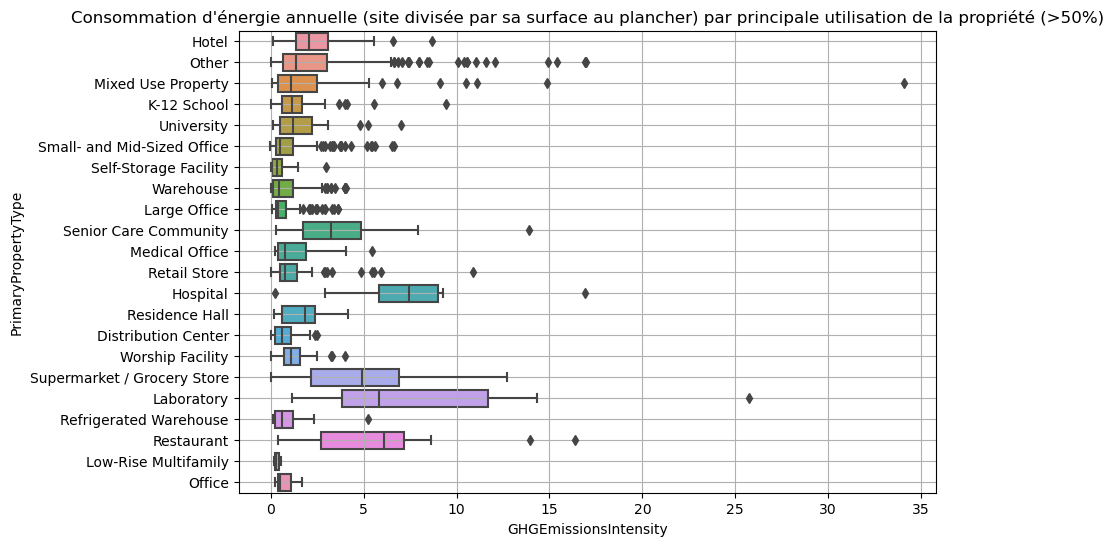

In [41]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='GHGEmissionsIntensity',y="PrimaryPropertyType",data=no_resid, showfliers=True)
plt.title("Consommation d'énergie annuelle (site divisée par sa surface au plancher) par principale utilisation de la propriété (>50%)")
plt.grid()
plt.show()

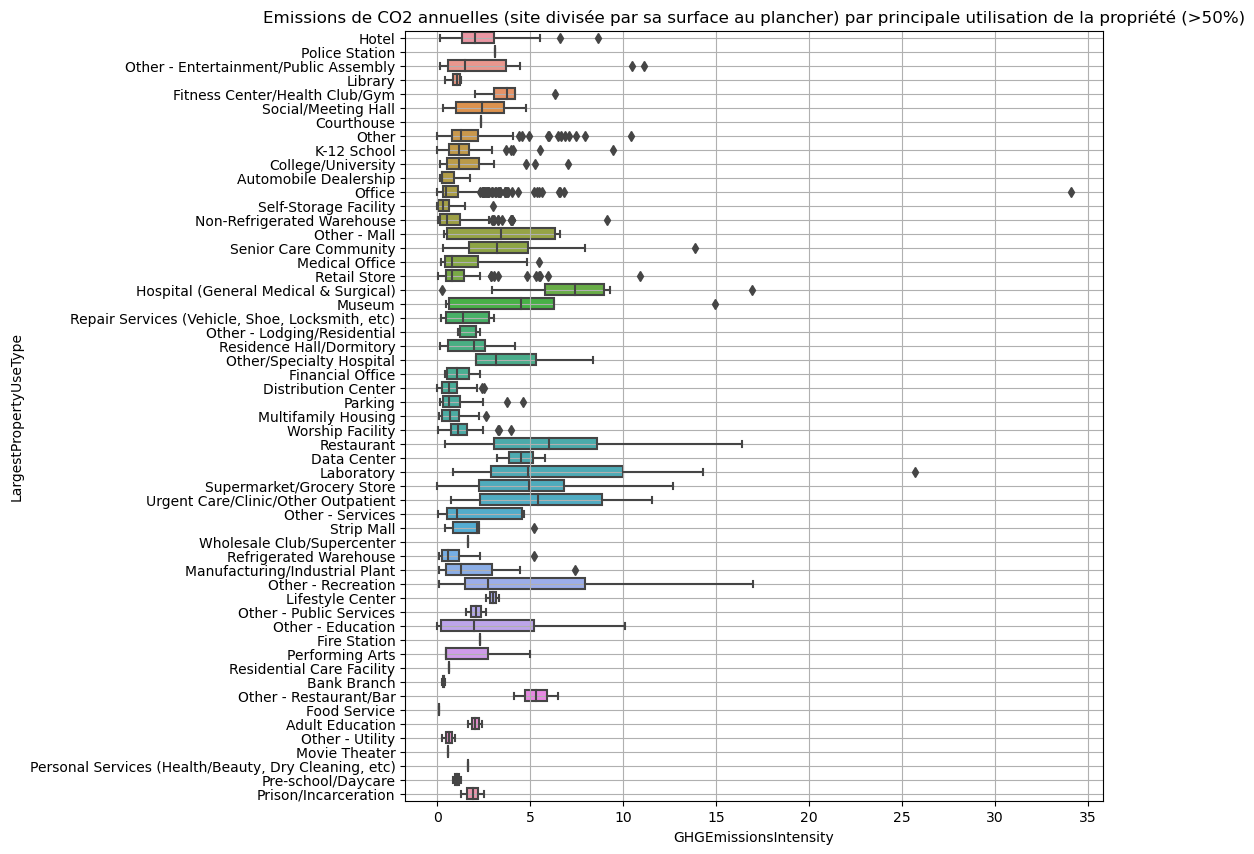

In [42]:
fig = plt.figure(1, figsize=(9,10))
sns.boxplot(x='GHGEmissionsIntensity',y="LargestPropertyUseType",data=no_resid, showfliers=True)
plt.title("Emissions de CO2 annuelles (site divisée par sa surface au plancher) par principale utilisation de la propriété (>50%)")
plt.grid()
plt.show()

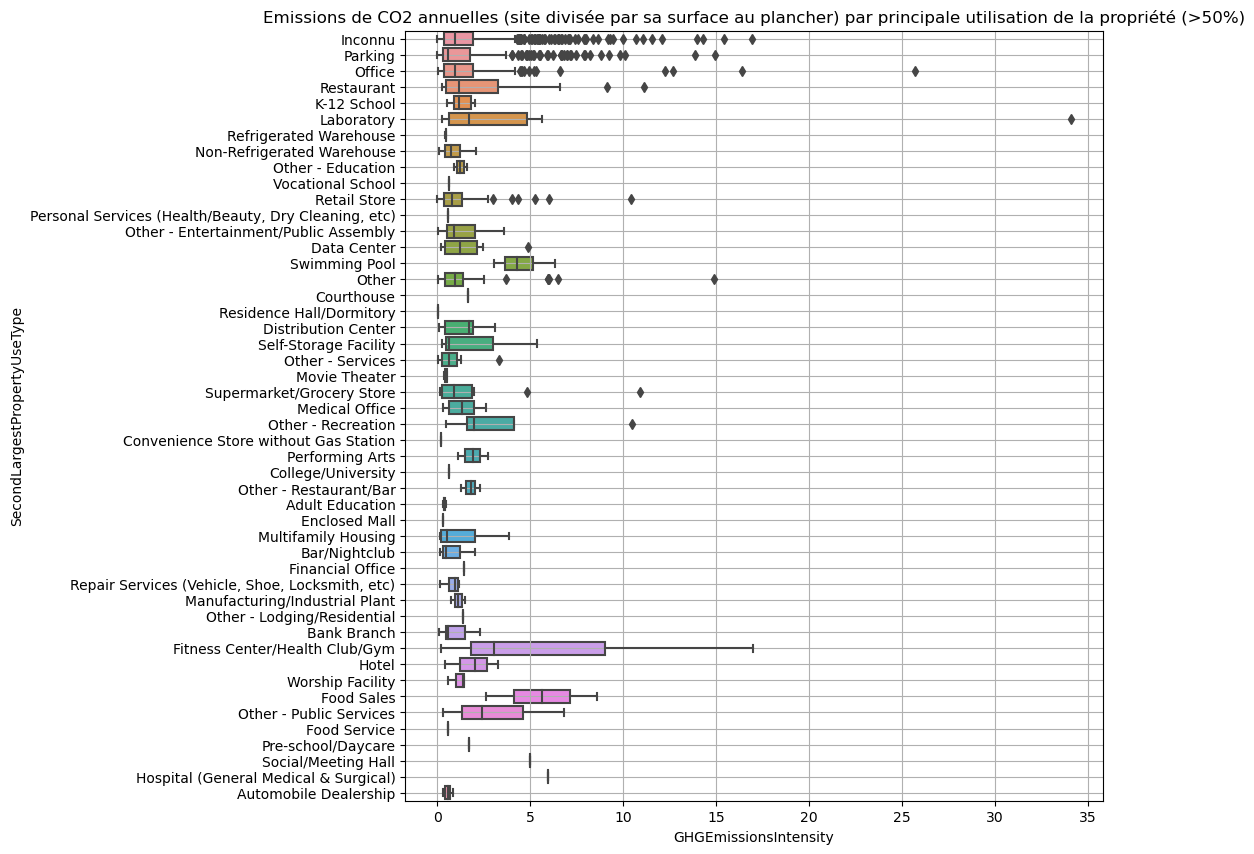

In [43]:
fig = plt.figure(1, figsize=(9,10))
sns.boxplot(x='GHGEmissionsIntensity',y="SecondLargestPropertyUseType",data=no_resid, showfliers=True)
plt.title("Emissions de CO2 annuelles (site divisée par sa surface au plancher) par principale utilisation de la propriété (>50%)")
plt.grid()
plt.show()

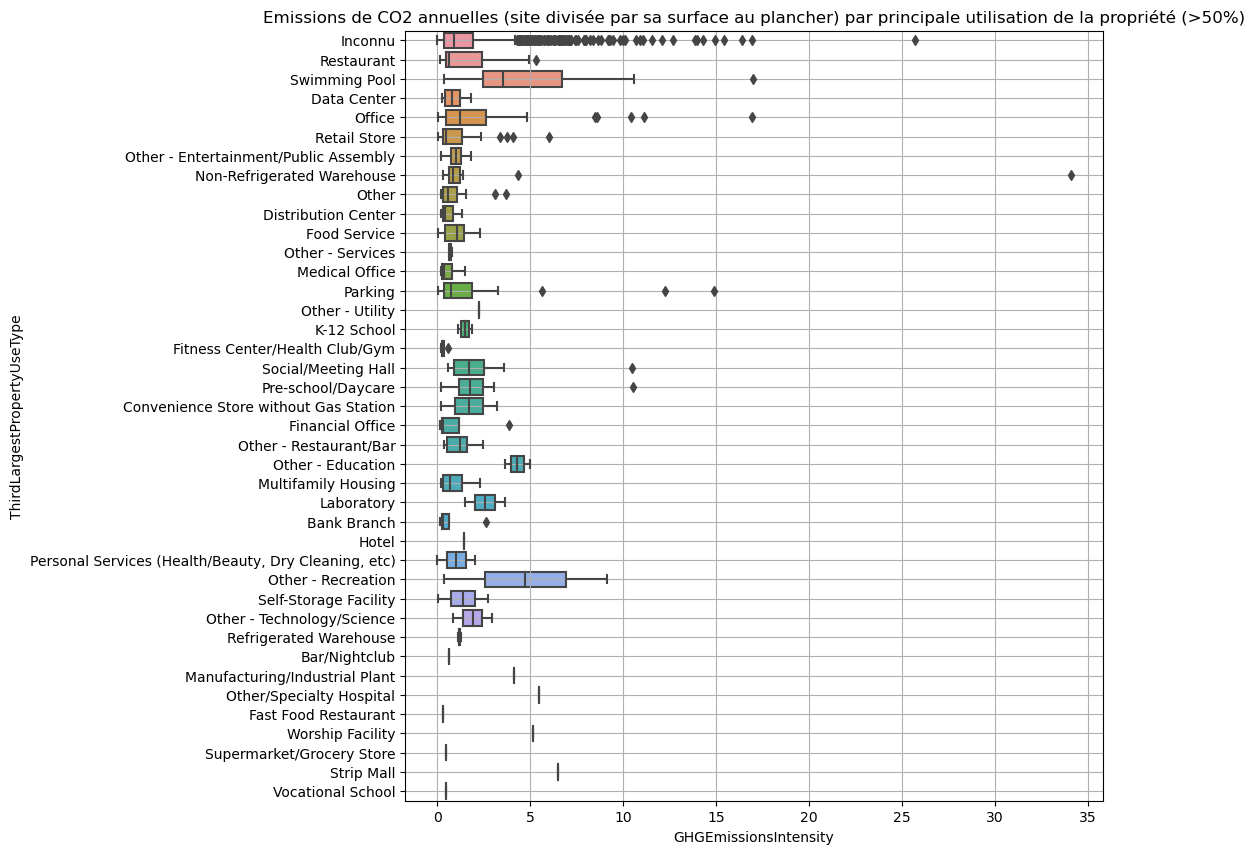

In [44]:
fig = plt.figure(1, figsize=(9,10))
sns.boxplot(x='GHGEmissionsIntensity',y="ThirdLargestPropertyUseType",data=no_resid, showfliers=True)
plt.title("Emissions de CO2 annuelles (site divisée par sa surface au plancher) par principale utilisation de la propriété (>50%)")
plt.grid()
plt.show()

In [45]:
bad_str = ['/','-',' ','(',')',',','&']
for bad in bad_str : 
    no_resid.columns = no_resid.columns.str.replace(bad, '')

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_15336\2292933791.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  no_resid.columns = no_resid.columns.str.replace(bad, '')
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_15336\2292933791.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  no_resid.columns = no_resid.columns.str.replace(bad, '')


In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Créez une liste des colonnes du DataFrame
bivar = no_resid.columns.tolist()
bivar

['OSEBuildingID',
 'BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuildings',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'SiteEUIkBtusf',
 'SiteEUIWNkBtusf',
 'SourceEUIkBtusf',
 'SourceEUIWNkBtusf',
 'SiteEnergyUsekBtu',
 'SiteEnergyUseWNkBtu',
 'SteamUsekBtu',
 'ElectricitykBtu',
 'NaturalGaskBtu',
 'DefaultData',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [47]:
# Colonnes à supprimer de la liste bivar
cols_to_remove = ['OSEBuildingID','SiteEUIkBtusf','SiteEUIWNkBtusf','SourceEUIkBtusf','SourceEUIWNkBtusf','SiteEnergyUsekBtu','SiteEnergyUseWNkBtu','SteamUsekBtu','ElectricitykBtu','NaturalGaskBtu','DefaultData','ComplianceStatus','Outlier','TotalGHGEmissions','GHGEmissionsIntensity']                
                
# Supprimez les colonnes de la liste bivar
bivar = [col for col in bivar if col not in cols_to_remove]

# Réalisez une analyse bivariée pour chaque variable explicative
for col in bivar:
    formula = f'SiteEUIWNkBtusf ~ {col}'
    reg_single = smf.ols(formula, data=no_resid).fit()
    print(f"Analyse bivariée pour '{col}':")
    print(reg_single.summary())
    print("\n")

Analyse bivariée pour 'BuildingType':
                            OLS Regression Results                            
Dep. Variable:        SiteEUIWNkBtusf   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     10.61
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           1.74e-08
Time:                        09:02:59   Log-Likelihood:                -9529.9
No. Observations:                1665   AIC:                         1.907e+04
Df Residuals:                    1660   BIC:                         1.910e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

Analyse bivariée pour 'LargestPropertyUseTypeGFA':
                            OLS Regression Results                            
Dep. Variable:        SiteEUIWNkBtusf   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.01662
Date:                Fri, 04 Aug 2023   Prob (F-statistic):              0.897
Time:                        09:02:59   Log-Likelihood:                -9550.9
No. Observations:                1665   AIC:                         1.911e+04
Df Residuals:                    1663   BIC:                         1.912e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [48]:
# Créer les colonnes Dummies pour les colonnes d'intérêt
dum_1 = pd.get_dummies(no_resid['LargestPropertyUseType'], prefix='First')
dum_2 = pd.get_dummies(no_resid['SecondLargestPropertyUseType'], prefix='Second')
dum_3 = pd.get_dummies(no_resid['ThirdLargestPropertyUseType'], prefix='Third')

# Concaténer les colonnes Dummies avec le DataFrame original
dum = pd.concat([no_resid, dum_1, dum_2, dum_3], axis=1)

bad_str = ['/','-',' ','(',')',',','&']
for bad in bad_str : 
    dum.columns = dum.columns.str.replace(bad, '') 

# Supprimer les colonnes qui vont être remplacées par les colonnes créées par get_dummies
dum = dum.drop(columns=['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'])

# Afficher le DataFrame résultant
dum

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_15336\3139149008.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dum.columns = dum.columns.str.replace(bad, '')
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_15336\3139149008.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dum.columns = dum.columns.str.replace(bad, '')


,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuildings,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SiteEUIkBtusf,SiteEUIWNkBtusf,SourceEUIkBtusf,SourceEUIWNkBtusf,SiteEnergyUsekBtu,SiteEnergyUseWNkBtu,SteamUsekBtu,ElectricitykBtu,NaturalGaskBtu,DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,First_AdultEducation,First_AutomobileDealership,First_BankBranch,First_CollegeUniversity,First_Courthouse,First_DataCenter,First_DistributionCenter,First_FinancialOffice,First_FireStation,First_FitnessCenterHealthClubGym,First_FoodService,First_HospitalGeneralMedicalSurgical,First_Hotel,First_K12School,First_Laboratory,First_Library,First_LifestyleCenter,First_ManufacturingIndustrialPlant,First_MedicalOffice,First_MovieTheater,First_MultifamilyHousing,First_Museum,First_NonRefrigeratedWarehouse,First_Office,First_Other,First_OtherEducation,First_OtherEntertainmentPublicAssembly,First_OtherLodgingResidential,First_OtherMall,First_OtherPublicServices,First_OtherRecreation,First_OtherRestaurantBar,First_OtherServices,First_OtherUtility,First_OtherSpecialtyHospital,First_Parking,First_PerformingArts,First_PersonalServicesHealthBeautyDryCleaningetc,First_PoliceStation,First_PreschoolDaycare,First_PrisonIncarceration,First_RefrigeratedWarehouse,First_RepairServicesVehicleShoeLocksmithetc,First_ResidenceHallDormitory,First_ResidentialCareFacility,First_Restaurant,First_RetailStore,First_SelfStorageFacility,First_SeniorCareCommunity,First_SocialMeetingHall,First_StripMall,First_SupermarketGroceryStore,First_UrgentCareClinicOtherOutpatient,First_WholesaleClubSupercenter,First_WorshipFacility,Second_AdultEducation,Second_AutomobileDealership,Second_BankBranch,Second_BarNightclub,Second_CollegeUniversity,Second_ConvenienceStorewithoutGasStation,Second_Courthouse,Second_DataCenter,Second_DistributionCenter,Second_EnclosedMall,Second_FinancialOffice,Second_FitnessCenterHealthClubGym,Second_FoodSales,Second_FoodService,Second_HospitalGeneralMedicalSurgical,Second_Hotel,Second_Inconnu,Second_K12School,Second_Laboratory,Second_ManufacturingIndustrialPlant,Second_MedicalOffice,Second_MovieTheater,Second_MultifamilyHousing,Second_NonRefrigeratedWarehouse,Second_Office,Second_Other,Second_OtherEducation,Second_OtherEntertainmentPublicAssembly,Second_OtherLodgingResidential,Second_OtherPublicServices,Second_OtherRecreation,Second_OtherRestaurantBar,Second_OtherServices,Second_Parking,Second_PerformingArts,Second_PersonalServicesHealthBeautyDryCleaningetc,Second_PreschoolDaycare,Second_RefrigeratedWarehouse,Second_RepairServicesVehicleShoeLocksmithetc,Second_ResidenceHallDormitory,Second_Restaurant,Second_RetailStore,Second_SelfStorageFacility,Second_SocialMeetingHall,Second_SupermarketGroceryStore,Second_SwimmingPool,Second_VocationalSchool,Second_WorshipFacility,Third_BankBranch,Third_BarNightclub,Third_ConvenienceStorewithoutGasStation,Third_DataCenter,Third_DistributionCenter,Third_FastFoodRestaurant,Third_FinancialOffice,Third_FitnessCenterHealthClubGym,Third_FoodService,Third_Hotel,Third_Inconnu,Third_K12School,Third_Laboratory,Third_ManufacturingIndustrialPlant,Third_MedicalOffice,Third_MultifamilyHousing,Third_NonRefrigeratedWarehouse,Third_Office,Third_Other,Third_OtherEducation,Third_OtherEntertainmentPublicAssembly,Third_OtherRecreation,Third_OtherRestaurantBar,Third_OtherServices,Third_OtherTechnologyScience,Third_OtherUtility,Third_OtherSpecialtyHospital,Third_Parking,Third_PersonalServicesHealthBeautyDryCleaningetc,Third_PreschoolDaycare,Third_RefrigeratedWarehouse,Third_Restaurant,Third_RetailStore,Third_SelfStorageFacility,Third_SocialMeetingHall,Third_StripMall,Third_SupermarketGroceryStore,Third_SwimmingPool,Third_VocationalSchool,Third_WorshipFacility
0,1,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,88434.0,0.0,0.0,81.699997,84.300003,182.500000,189.0000

In [49]:
# Liste des colonnes commençant par "first" dans le DataFrame dum
columns_starting_with_first = [col for col in dum.columns if col.startswith("First")]

# Afficher la liste des colonnes
#columns_starting_with_first
    
# Définition de la fonction first_variables
def first_variables(col):
    dum[col] = dum[col] * dum["LargestPropertyUseTypeGFA"]

# Appliquer la fonction first_variables à chaque colonne commençant par "First"
for col in columns_starting_with_first:
    first_variables(col)

In [50]:
# Colonnes à supprimer de la liste
cols_to_remove = ['SecondLargestPropertyUseTypeGFA']                
                
# Liste des colonnes commençant par "second" dans le DataFrame dum sauf...
columns_starting_with_second = [col for col in dum.columns if col.startswith("Second") and col not in cols_to_remove]

# Définition de la fonction second_variables
def second_variables(col):
    dum[col] = dum[col] * dum["SecondLargestPropertyUseTypeGFA"]

# Appliquer la fonction second_variables à chaque colonne commençant par "Second"
for col in columns_starting_with_second:
    second_variables(col)

In [51]:
# Colonnes à supprimer de la liste
cols_to_remove = ['ThirdLargestPropertyUseTypeGFA']  

# Liste des colonnes commençant par "first" dans le DataFrame dum
columns_starting_with_third = [col for col in dum.columns if col.startswith("Third") and col not in cols_to_remove]

# Définition de la fonction first_variables
def third_variables(col):
    dum[col] = dum[col] * dum["ThirdLargestPropertyUseTypeGFA"]

# Appliquer la fonction first_variables à chaque colonne commençant par "First"
for col in columns_starting_with_third:
    third_variables(col)

In [52]:
dum.columns.tolist()

['OSEBuildingID',
 'BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuildings',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'SiteEUIkBtusf',
 'SiteEUIWNkBtusf',
 'SourceEUIkBtusf',
 'SourceEUIWNkBtusf',
 'SiteEnergyUsekBtu',
 'SiteEnergyUseWNkBtu',
 'SteamUsekBtu',
 'ElectricitykBtu',
 'NaturalGaskBtu',
 'DefaultData',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'First_AdultEducation',
 'First_AutomobileDealership',
 'First_BankBranch',
 'First_CollegeUniversity',
 'First_Courthouse',
 'First_DataCenter',
 'First_DistributionCenter',
 'First_FinancialOffice',
 'First_FireStation',
 'First_FitnessCenterHealthClubGym',
 'First_FoodService',
 'First_HospitalGeneralMedicalSurgical',
 'First_Hotel',
 'First_K12School',
 'First_Laboratory',
 'First_Library',
 'First_LifestyleCent

In [53]:
# Suppression de colonnes inutiles
dum = dum.drop(['OSEBuildingID',
 'BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'SiteEUIkBtusf',
 'SiteEUIWNkBtusf',
 'SourceEUIkBtusf',
 'SourceEUIWNkBtusf',
 'SiteEnergyUsekBtu',
 'SiteEnergyUseWNkBtu',
 'SteamUsekBtu',
 'ElectricitykBtu',
 'NaturalGaskBtu',
 'DefaultData',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity'], axis=1)

In [54]:
dum

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuildings,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,First_AdultEducation,First_AutomobileDealership,First_BankBranch,First_CollegeUniversity,First_Courthouse,First_DataCenter,First_DistributionCenter,First_FinancialOffice,First_FireStation,First_FitnessCenterHealthClubGym,First_FoodService,First_HospitalGeneralMedicalSurgical,First_Hotel,First_K12School,First_Laboratory,First_Library,First_LifestyleCenter,First_ManufacturingIndustrialPlant,First_MedicalOffice,First_MovieTheater,First_MultifamilyHousing,First_Museum,First_NonRefrigeratedWarehouse,First_Office,First_Other,First_OtherEducation,First_OtherEntertainmentPublicAssembly,First_OtherLodgingResidential,First_OtherMall,First_OtherPublicServices,First_OtherRecreation,First_OtherRestaurantBar,First_OtherServices,First_OtherUtility,First_OtherSpecialtyHospital,First_Parking,First_PerformingArts,First_PersonalServicesHealthBeautyDryCleaningetc,First_PoliceStation,First_PreschoolDaycare,First_PrisonIncarceration,First_RefrigeratedWarehouse,First_RepairServicesVehicleShoeLocksmithetc,First_ResidenceHallDormitory,First_ResidentialCareFacility,First_Restaurant,First_RetailStore,First_SelfStorageFacility,First_SeniorCareCommunity,First_SocialMeetingHall,First_StripMall,First_SupermarketGroceryStore,First_UrgentCareClinicOtherOutpatient,First_WholesaleClubSupercenter,First_WorshipFacility,Second_AdultEducation,Second_AutomobileDealership,Second_BankBranch,Second_BarNightclub,Second_CollegeUniversity,Second_ConvenienceStorewithoutGasStation,Second_Courthouse,Second_DataCenter,Second_DistributionCenter,Second_EnclosedMall,Second_FinancialOffice,Second_FitnessCenterHealthClubGym,Second_FoodSales,Second_FoodService,Second_HospitalGeneralMedicalSurgical,Second_Hotel,Second_Inconnu,Second_K12School,Second_Laboratory,Second_ManufacturingIndustrialPlant,Second_MedicalOffice,Second_MovieTheater,Second_MultifamilyHousing,Second_NonRefrigeratedWarehouse,Second_Office,Second_Other,Second_OtherEducation,Second_OtherEntertainmentPublicAssembly,Second_OtherLodgingResidential,Second_OtherPublicServices,Second_OtherRecreation,Second_OtherRestaurantBar,Second_OtherServices,Second_Parking,Second_PerformingArts,Second_PersonalServicesHealthBeautyDryCleaningetc,Second_PreschoolDaycare,Second_RefrigeratedWarehouse,Second_RepairServicesVehicleShoeLocksmithetc,Second_ResidenceHallDormitory,Second_Restaurant,Second_RetailStore,Second_SelfStorageFacility,Second_SocialMeetingHall,Second_SupermarketGroceryStore,Second_SwimmingPool,Second_VocationalSchool,Second_WorshipFacility,Third_BankBranch,Third_BarNightclub,Third_ConvenienceStorewithoutGasStation,Third_DataCenter,Third_DistributionCenter,Third_FastFoodRestaurant,Third_FinancialOffice,Third_FitnessCenterHealthClubGym,Third_FoodService,Third_Hotel,Third_Inconnu,Third_K12School,Third_Laboratory,Third_ManufacturingIndustrialPlant,Third_MedicalOffice,Third_MultifamilyHousing,Third_NonRefrigeratedWarehouse,Third_Office,Third_Other,Third_OtherEducation,Third_OtherEntertainmentPublicAssembly,Third_OtherRecreation,Third_OtherRestaurantBar,Third_OtherServices,Third_OtherTechnologyScience,Third_OtherUtility,Third_OtherSpecialtyHospital,Third_Parking,Third_PersonalServicesHealthBeautyDryCleaningetc,Third_PreschoolDaycare,Third_RefrigeratedWarehouse,Third_Restaurant,Third_RetailStore,Third_SelfStorageFacility,Third_SocialMeetingHall,Third_StripMall,Third_SupermarketGroceryStore,Third_SwimmingPool,Third_VocationalSchool,Third_WorshipFacility
0,88434,0,88434,88434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [55]:
# Corriger la colonne PropertyGFATotal par totale GFA
dum['Var_GFA'] = (dum[columns_starting_with_first + columns_starting_with_second + columns_starting_with_third].sum(axis=1)) - dum['PropertyGFATotal']
dum['Totale_GFA'] = dum['PropertyGFATotal'] + dum['Var_GFA']
dum

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuildings,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,First_AdultEducation,First_AutomobileDealership,First_BankBranch,First_CollegeUniversity,First_Courthouse,First_DataCenter,First_DistributionCenter,First_FinancialOffice,First_FireStation,First_FitnessCenterHealthClubGym,First_FoodService,First_HospitalGeneralMedicalSurgical,First_Hotel,First_K12School,First_Laboratory,First_Library,First_LifestyleCenter,First_ManufacturingIndustrialPlant,First_MedicalOffice,First_MovieTheater,First_MultifamilyHousing,First_Museum,First_NonRefrigeratedWarehouse,First_Office,First_Other,First_OtherEducation,First_OtherEntertainmentPublicAssembly,First_OtherLodgingResidential,First_OtherMall,First_OtherPublicServices,First_OtherRecreation,First_OtherRestaurantBar,First_OtherServices,First_OtherUtility,First_OtherSpecialtyHospital,First_Parking,First_PerformingArts,First_PersonalServicesHealthBeautyDryCleaningetc,First_PoliceStation,First_PreschoolDaycare,First_PrisonIncarceration,First_RefrigeratedWarehouse,First_RepairServicesVehicleShoeLocksmithetc,First_ResidenceHallDormitory,First_ResidentialCareFacility,First_Restaurant,First_RetailStore,First_SelfStorageFacility,First_SeniorCareCommunity,First_SocialMeetingHall,First_StripMall,First_SupermarketGroceryStore,First_UrgentCareClinicOtherOutpatient,First_WholesaleClubSupercenter,First_WorshipFacility,Second_AdultEducation,Second_AutomobileDealership,Second_BankBranch,Second_BarNightclub,Second_CollegeUniversity,Second_ConvenienceStorewithoutGasStation,Second_Courthouse,Second_DataCenter,Second_DistributionCenter,Second_EnclosedMall,Second_FinancialOffice,Second_FitnessCenterHealthClubGym,Second_FoodSales,Second_FoodService,Second_HospitalGeneralMedicalSurgical,Second_Hotel,Second_Inconnu,Second_K12School,Second_Laboratory,Second_ManufacturingIndustrialPlant,Second_MedicalOffice,Second_MovieTheater,Second_MultifamilyHousing,Second_NonRefrigeratedWarehouse,Second_Office,Second_Other,Second_OtherEducation,Second_OtherEntertainmentPublicAssembly,Second_OtherLodgingResidential,Second_OtherPublicServices,Second_OtherRecreation,Second_OtherRestaurantBar,Second_OtherServices,Second_Parking,Second_PerformingArts,Second_PersonalServicesHealthBeautyDryCleaningetc,Second_PreschoolDaycare,Second_RefrigeratedWarehouse,Second_RepairServicesVehicleShoeLocksmithetc,Second_ResidenceHallDormitory,Second_Restaurant,Second_RetailStore,Second_SelfStorageFacility,Second_SocialMeetingHall,Second_SupermarketGroceryStore,Second_SwimmingPool,Second_VocationalSchool,Second_WorshipFacility,Third_BankBranch,Third_BarNightclub,Third_ConvenienceStorewithoutGasStation,Third_DataCenter,Third_DistributionCenter,Third_FastFoodRestaurant,Third_FinancialOffice,Third_FitnessCenterHealthClubGym,Third_FoodService,Third_Hotel,Third_Inconnu,Third_K12School,Third_Laboratory,Third_ManufacturingIndustrialPlant,Third_MedicalOffice,Third_MultifamilyHousing,Third_NonRefrigeratedWarehouse,Third_Office,Third_Other,Third_OtherEducation,Third_OtherEntertainmentPublicAssembly,Third_OtherRecreation,Third_OtherRestaurantBar,Third_OtherServices,Third_OtherTechnologyScience,Third_OtherUtility,Third_OtherSpecialtyHospital,Third_Parking,Third_PersonalServicesHealthBeautyDryCleaningetc,Third_PreschoolDaycare,Third_RefrigeratedWarehouse,Third_Restaurant,Third_RetailStore,Third_SelfStorageFacility,Third_SocialMeetingHall,Third_StripMall,Third_SupermarketGroceryStore,Third_SwimmingPool,Third_VocationalSchool,Third_WorshipFacility,Var_GFA,Totale_GFA
0,88434,0,88434,88434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [56]:
dum.columns.tolist()

['PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuildings',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'First_AdultEducation',
 'First_AutomobileDealership',
 'First_BankBranch',
 'First_CollegeUniversity',
 'First_Courthouse',
 'First_DataCenter',
 'First_DistributionCenter',
 'First_FinancialOffice',
 'First_FireStation',
 'First_FitnessCenterHealthClubGym',
 'First_FoodService',
 'First_HospitalGeneralMedicalSurgical',
 'First_Hotel',
 'First_K12School',
 'First_Laboratory',
 'First_Library',
 'First_LifestyleCenter',
 'First_ManufacturingIndustrialPlant',
 'First_MedicalOffice',
 'First_MovieTheater',
 'First_MultifamilyHousing',
 'First_Museum',
 'First_NonRefrigeratedWarehouse',
 'First_Office',
 'First_Other',
 'First_OtherEducation',
 'First_OtherEntertainmentPublicAssembly',
 'First_OtherLodgingResidential',
 'First_OtherMall',
 'First_OtherPublicServices',
 'First_OtherRecreation',
 'First_OtherRestaurantBar'

In [128]:
# Liste des variables
variables_list = dum.columns.tolist()

# Créer un dictionnaire pour stocker le nombre d'occurrences de chaque partie du nom
part_occurrences = {}

# Parcourir chaque variable
for variable in variables_list:
    # Extraire la partie après le "_"
    parts = variable.split("_")[1:]
    part = "_".join(parts)

    # Incrémenter le compteur pour cette partie du nom
    part_occurrences[part] = part_occurrences.get(part, 0) + 1

# Afficher les parties du nom qui apparaissent plus d'une fois
doublons = [part for part, count in part_occurrences.items() if count > 1]
print("Parties du nom avec plusieurs occurrences après le '_':", doublons)

Parties du nom avec plusieurs occurrences après le '_': ['', 'AdultEducation', 'AutomobileDealership', 'BankBranch', 'CollegeUniversity', 'Courthouse', 'DataCenter', 'DistributionCenter', 'FinancialOffice', 'FitnessCenterHealthClubGym', 'FoodService', 'HospitalGeneralMedicalSurgical', 'Hotel', 'K12School', 'Laboratory', 'ManufacturingIndustrialPlant', 'MedicalOffice', 'MovieTheater', 'MultifamilyHousing', 'NonRefrigeratedWarehouse', 'Office', 'Other', 'OtherEducation', 'OtherEntertainmentPublicAssembly', 'OtherLodgingResidential', 'OtherPublicServices', 'OtherRecreation', 'OtherRestaurantBar', 'OtherServices', 'OtherUtility', 'OtherSpecialtyHospital', 'Parking', 'PerformingArts', 'PersonalServicesHealthBeautyDryCleaningetc', 'PreschoolDaycare', 'RefrigeratedWarehouse', 'RepairServicesVehicleShoeLocksmithetc', 'ResidenceHallDormitory', 'Restaurant', 'RetailStore', 'SelfStorageFacility', 'SocialMeetingHall', 'StripMall', 'SupermarketGroceryStore', 'WorshipFacility', 'BarNightclub', 'Conv

In [129]:
# Créer un DataFrame avec les données
test = pd.DataFrame(dum)

# Créer un dictionnaire pour stocker les données regroupées par occurrence
grouped_data = {}

# Parcourir chaque variable
for variable in test.columns:
    # Extraire la partie après le "_"
    parts = variable.split("_")[1:]
    part = "_".join(parts)

    # Ajouter les données dans le groupe correspondant
    if part not in grouped_data:
        grouped_data[part] = test[variable]
    else:
        grouped_data[part] += test[variable]

# Créer une colonne pour chaque occurrence avec les données regroupées
for part, values in grouped_data.items():
    test[part] = values

# Supprimer les colonnes d'origine avec les noms complets
test.drop(columns=test.columns[:-len(grouped_data)], inplace=True)
test

,,AdultEducation,AutomobileDealership,BankBranch,CollegeUniversity,Courthouse,DataCenter,DistributionCenter,FinancialOffice,FireStation,FitnessCenterHealthClubGym,FoodService,HospitalGeneralMedicalSurgical,Hotel,K12School,Laboratory,Library,LifestyleCenter,ManufacturingIndustrialPlant,MedicalOffice,MovieTheater,MultifamilyHousing,Museum,NonRefrigeratedWarehouse,Office,Other,OtherEducation,OtherEntertainmentPublicAssembly,OtherLodgingResidential,OtherMall,OtherPublicServices,OtherRecreation,OtherRestaurantBar,OtherServices,OtherUtility,OtherSpecialtyHospital,Parking,PerformingArts,PersonalServicesHealthBeautyDryCleaningetc,PoliceStation,PreschoolDaycare,PrisonIncarceration,RefrigeratedWarehouse,RepairServicesVehicleShoeLocksmithetc,ResidenceHallDormitory,ResidentialCareFacility,Restaurant,RetailStore,SelfStorageFacility,SeniorCareCommunity,SocialMeetingHall,StripMall,SupermarketGroceryStore,UrgentCareClinicOtherOutpatient,WholesaleClubSupercenter,WorshipFacility,BarNightclub,ConvenienceStorewithoutGasStation,EnclosedMall,FoodSales,Inconnu,SwimmingPool,VocationalSchool,FastFoodRestaurant,OtherTechnologyScience,GFA
0,265302.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176868.0
1,310698.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83880.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15064.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207132.0
2,2668713.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,756493.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1313369.0
3,183960.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122640.0
4,542614.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123445.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,398782.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,36882.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24588.0
3372,48000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16000.0
3373,39471.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5574.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13157.0
3374,41788.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6501.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6601.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13555.0


In [ ]:
# Calculer la somme des colonnes à soustraire
sum_columns = test[['First_DataCenter', 'First_HospitalGeneralMedicalSurgical', 'First_Laboratory', 'First_Museum', 'First_OtherRecreation', 'First_OtherSpecialtyHospital', 'First_Restaurant', 'First_SupermarketGroceryStore', 'First_UrgentCareClinicOtherOutpatient', 'Second_DataCenter', 'Second_FitnessCenterHealthClubGym', 'Second_Laboratory', 'Third_SwimmingPool']].sum(axis=1)

# Créer la colonne "Autre_GFA" en soustrayant la somme des colonnes de "PropertyGFATotal"
test['Autre_GFA'] = test['Totale_GFA'] - sum_columns

In [ ]:
XXXXXXX

In [57]:
# Calculer la somme des colonnes à soustraire
sum_columns = dum[['First_DataCenter', 'First_HospitalGeneralMedicalSurgical', 'First_Laboratory', 'First_Museum', 'First_OtherRecreation', 'First_OtherSpecialtyHospital', 'First_Restaurant', 'First_SupermarketGroceryStore', 'First_UrgentCareClinicOtherOutpatient', 'Second_DataCenter', 'Second_FitnessCenterHealthClubGym', 'Second_Laboratory', 'Third_SwimmingPool']].sum(axis=1)

# Créer la colonne "Autre_GFA" en soustrayant la somme des colonnes de "PropertyGFATotal"
dum['Autre_GFA'] = dum['Totale_GFA'] - sum_columns

In [58]:
dum

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuildings,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,First_AdultEducation,First_AutomobileDealership,First_BankBranch,First_CollegeUniversity,First_Courthouse,First_DataCenter,First_DistributionCenter,First_FinancialOffice,First_FireStation,First_FitnessCenterHealthClubGym,First_FoodService,First_HospitalGeneralMedicalSurgical,First_Hotel,First_K12School,First_Laboratory,First_Library,First_LifestyleCenter,First_ManufacturingIndustrialPlant,First_MedicalOffice,First_MovieTheater,First_MultifamilyHousing,First_Museum,First_NonRefrigeratedWarehouse,First_Office,First_Other,First_OtherEducation,First_OtherEntertainmentPublicAssembly,First_OtherLodgingResidential,First_OtherMall,First_OtherPublicServices,First_OtherRecreation,First_OtherRestaurantBar,First_OtherServices,First_OtherUtility,First_OtherSpecialtyHospital,First_Parking,First_PerformingArts,First_PersonalServicesHealthBeautyDryCleaningetc,First_PoliceStation,First_PreschoolDaycare,First_PrisonIncarceration,First_RefrigeratedWarehouse,First_RepairServicesVehicleShoeLocksmithetc,First_ResidenceHallDormitory,First_ResidentialCareFacility,First_Restaurant,First_RetailStore,First_SelfStorageFacility,First_SeniorCareCommunity,First_SocialMeetingHall,First_StripMall,First_SupermarketGroceryStore,First_UrgentCareClinicOtherOutpatient,First_WholesaleClubSupercenter,First_WorshipFacility,Second_AdultEducation,Second_AutomobileDealership,Second_BankBranch,Second_BarNightclub,Second_CollegeUniversity,Second_ConvenienceStorewithoutGasStation,Second_Courthouse,Second_DataCenter,Second_DistributionCenter,Second_EnclosedMall,Second_FinancialOffice,Second_FitnessCenterHealthClubGym,Second_FoodSales,Second_FoodService,Second_HospitalGeneralMedicalSurgical,Second_Hotel,Second_Inconnu,Second_K12School,Second_Laboratory,Second_ManufacturingIndustrialPlant,Second_MedicalOffice,Second_MovieTheater,Second_MultifamilyHousing,Second_NonRefrigeratedWarehouse,Second_Office,Second_Other,Second_OtherEducation,Second_OtherEntertainmentPublicAssembly,Second_OtherLodgingResidential,Second_OtherPublicServices,Second_OtherRecreation,Second_OtherRestaurantBar,Second_OtherServices,Second_Parking,Second_PerformingArts,Second_PersonalServicesHealthBeautyDryCleaningetc,Second_PreschoolDaycare,Second_RefrigeratedWarehouse,Second_RepairServicesVehicleShoeLocksmithetc,Second_ResidenceHallDormitory,Second_Restaurant,Second_RetailStore,Second_SelfStorageFacility,Second_SocialMeetingHall,Second_SupermarketGroceryStore,Second_SwimmingPool,Second_VocationalSchool,Second_WorshipFacility,Third_BankBranch,Third_BarNightclub,Third_ConvenienceStorewithoutGasStation,Third_DataCenter,Third_DistributionCenter,Third_FastFoodRestaurant,Third_FinancialOffice,Third_FitnessCenterHealthClubGym,Third_FoodService,Third_Hotel,Third_Inconnu,Third_K12School,Third_Laboratory,Third_ManufacturingIndustrialPlant,Third_MedicalOffice,Third_MultifamilyHousing,Third_NonRefrigeratedWarehouse,Third_Office,Third_Other,Third_OtherEducation,Third_OtherEntertainmentPublicAssembly,Third_OtherRecreation,Third_OtherRestaurantBar,Third_OtherServices,Third_OtherTechnologyScience,Third_OtherUtility,Third_OtherSpecialtyHospital,Third_Parking,Third_PersonalServicesHealthBeautyDryCleaningetc,Third_PreschoolDaycare,Third_RefrigeratedWarehouse,Third_Restaurant,Third_RetailStore,Third_SelfStorageFacility,Third_SocialMeetingHall,Third_StripMall,Third_SupermarketGroceryStore,Third_SwimmingPool,Third_VocationalSchool,Third_WorshipFacility,Var_GFA,Totale_GFA,Autre_GFA
0,88434,0,88434,88434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [59]:
new_dum_list = ['PropertyGFAParking','First_DataCenter','First_HospitalGeneralMedicalSurgical','First_Laboratory','First_Museum','First_OtherRecreation','First_OtherSpecialtyHospital','First_Restaurant','First_SupermarketGroceryStore','First_UrgentCareClinicOtherOutpatient','Second_DataCenter','Second_FitnessCenterHealthClubGym','Second_Laboratory','Third_SwimmingPool','Autre_GFA']

In [60]:
# Sélectionner les colonnes spécifiées dans un nouveau DataFrame
new_dum = dum[new_dum_list]
new_dum

,PropertyGFAParking,First_DataCenter,First_HospitalGeneralMedicalSurgical,First_Laboratory,First_Museum,First_OtherRecreation,First_OtherSpecialtyHospital,First_Restaurant,First_SupermarketGroceryStore,First_UrgentCareClinicOtherOutpatient,Second_DataCenter,Second_FitnessCenterHealthClubGym,Second_Laboratory,Third_SwimmingPool,Autre_GFA
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88434.0
1,15064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103566.0
2,196718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,756493.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61320.0
4,62000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12294.0
3372,0,0.0,0.0,0.0,0.0,16000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3373,0,0.0,0.0,0.0,0.0,7583.0,0.0,0.0,0.0,0.0,0.0,5574.0,0.0,0.0,0.0
3374,0,0.0,0.0,0.0,0.0,6601.0,0.0,0.0,0.0,0.0,0.0,6501.0,0.0,0.0,484.0


In [75]:
# Concaténer les colonnes Dummies avec le DataFrame original
new_no_resid_dum = pd.concat([no_resid, new_dum], axis=1)
new_no_resid_dum

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuildings,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEUIkBtusf,SiteEUIWNkBtusf,SourceEUIkBtusf,SourceEUIWNkBtusf,SiteEnergyUsekBtu,SiteEnergyUseWNkBtu,SteamUsekBtu,ElectricitykBtu,NaturalGaskBtu,DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,PropertyGFAParking,First_DataCenter,First_HospitalGeneralMedicalSurgical,First_Laboratory,First_Museum,First_OtherRecreation,First_OtherSpecialtyHospital,First_Restaurant,First_SupermarketGroceryStore,First_UrgentCareClinicOtherOutpatient,Second_DataCenter,Second_FitnessCenterHealthClubGym,Second_Laboratory,Third_SwimmingPool,Autre_GFA
0,1,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,88434.0,Inconnu,0.0,Inconnu,0.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,3.946027e+06,1.276453e+06,False,Compliant,NaN,249.98,2.83,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88434.0
1,2,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,3.242851e+06,5.145082e+06,False,Compliant,NaN,295.86,2.86,15064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103566.0
2,3,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,759392,Hotel,756493.0,Inconnu,0.0,Inconnu,0.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,4.952666e+07,1.493800e+06,False,Compliant,NaN,2089.28,2.19,196718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,756493.0
3,5,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,61320.0,Inconnu,0.0,Inconnu,0.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,2.768924e+06,1.811213e+06,False,Compliant,NaN,286.43,4.67,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61320.0
4,8,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,5.368607e+06,8.803998e+06,False,Compliant,NaN,505.01,2.88,62000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1,12294,0,12294,Office,12294.0,Inconnu,0.0,Inconnu,0.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,5.242709e+05,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12294.0
3372,50223,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1,16000,0,16000,Other - Recreation,16000.0,Inconnu,0.0,Inconnu,0.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,3.965461e+05,5.537300e+05,False,Compliant,NaN,32.17,2.01,0,0.0,0.0,0.0,0.0,16000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3373,50224,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,0,13157,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,1.792159e+06,3.973739e+06,False,Compliant,NaN,223.54,16.99,0,0.0,0.0,0.0,0.0,7583.0,0.0,0.0,0.0,0.0,0.0,5574.0,0.0,0.0,0.0
3374,50225,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1,14101,0,14101,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,3.488702e+05,3.706010e+05,False,Compliant,NaN,22.11,1.57,0,0.0,0.0,0.0,0.0,6601.0,0.0,0.0,0.0,0.0,0.0,6501.0,0.0,0.0,484.0


In [86]:
new_no_resid_dum.describe(include = 'all')

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuildings,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEUIkBtusf,SiteEUIWNkBtusf,SourceEUIkBtusf,SourceEUIWNkBtusf,SiteEnergyUsekBtu,SiteEnergyUseWNkBtu,SteamUsekBtu,ElectricitykBtu,NaturalGaskBtu,DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,PropertyGFAParking,First_DataCenter,First_HospitalGeneralMedicalSurgical,First_Laboratory,First_Museum,First_OtherRecreation,First_OtherSpecialtyHospital,First_Restaurant,First_SupermarketGroceryStore,First_UrgentCareClinicOtherOutpatient,Second_DataCenter,Second_FitnessCenterHealthClubGym,Second_Laboratory,Third_SwimmingPool,Autre_GFA
count,1665.000000,1665,1665,1665,1665.000000,1665.000000,1665.000000,1.665000e+03,1665.000000,1.665000e+03,1665,1.665000e+03,1665,1665.000000,1665,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1.665000e+03,1.665000e+03,1.665000e+03,1.665000e+03,1.665000e+03,1665,1665,18,1665.000000,1665.000000,1665.000000,1665.000000,1.665000e+03,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.0,1.665000e+03
unique,NaN,5,22,19,NaN,NaN,NaN,NaN,NaN,NaN,55,NaN,48,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,Office,NaN,Inconnu,NaN,Inconnu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Compliant,Low outlier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1457,291,359,NaN,NaN,NaN,NaN,NaN,NaN,498,NaN,811,NaN,1312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1577,1548,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,16349.120721,NaN,NaN,NaN,1961.939940,1.200000,4.121321,1.181656e+05,12921.218619,1.052444e+05,NaN,9.809323e+04,NaN,18486.971349,NaN,3163.884924,72.158799,74.592252,175.935496,178.197838,8.443001e+06,8.067900e+06,5.128804e+05,5.847002e+06,1.972028e+06,NaN,NaN,NaN,185.084396,1.608811,12921.218619,189.187387,4.104069e+03,789.975976,112.342943,822.678078,107.178378,209.255856,1092.484084,178.920120,141.156156,72.388589,581.046847,0.0,1.113434e+05
std,13834.748505,NaN,NaN,NaN,32.740273,2.924984,6.568953,2.959547e+05,42309.051377,2.826828e+05,NaN,2.754391e+05,NaN,50737.277104,NaN,17987.610356,74.048129,75.011053,185.937997,185.923324,3.025218e+07,2.203800e+07,5.515586e+06,2.080248e+07,9.373504e+06,NaN,NaN,NaN,752.188245,2.337252,42309.051377,5632.798683,6.522686e+04,10380.285808,2237.316911,14489.946430,2208.762435,2485.840151,8045.748544,4365.245537,2772.433820,775.551265,16103.261117,0.0,2.931925e+05
min,1.000000,NaN,NaN,NaN,1900.000000,1.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,NaN,5.656000e+03,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,NaN,NaN,NaN,-0.800000,-0.020000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00
25%,583.000000,NaN,NaN,NaN,1930.000000,1.000000,1.000000,2.949800e+04,0.000000,2.849200e+04,NaN,2.554700e+04,NaN,0.000000,NaN,0.000000,33.700001,35.400002,76.599998,79.400002,1.232823e+06,1.296995e+06,0.000000e+00,7.224670e+05,0.000000e+00,NaN,NaN,NaN,20.080000,0.350000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.627000e+04
50%,21145.000000,NaN,NaN,NaN,1965.000000,1.000000,2.000000,4.928000e+04,0.000000,4.736800e+04,NaN,4.381300e+04,NaN,0.000000,NaN,0.000000,51.900002,53.900002,131.000000,134.199997,2.556131e+06,2.688676e+06,0.000000e+00,1.612547e+06,4.995090e+05,NaN,NaN,NaN,49.580000,0.880000,0.000

In [89]:
new_no_resid_dum.isna().sum()

OSEBuildingID                               0
BuildingType                                0
PrimaryPropertyType                         0
Neighborhood                                0
YearBuilt                                   0
NumberofBuildings                           0
NumberofFloors                              0
PropertyGFATotal                            0
PropertyGFAParking                          0
PropertyGFABuildings                        0
LargestPropertyUseType                      0
LargestPropertyUseTypeGFA                   0
SecondLargestPropertyUseType                0
SecondLargestPropertyUseTypeGFA             0
ThirdLargestPropertyUseType                 0
ThirdLargestPropertyUseTypeGFA              0
SiteEUIkBtusf                               0
SiteEUIWNkBtusf                             0
SourceEUIkBtusf                             0
SourceEUIWNkBtusf                           0
SiteEnergyUsekBtu                           0
SiteEnergyUseWNkBtu               

### Analyse multivariées

In [90]:
# Liste des colonnes à analyser multi-variées
multi_var = ['YearBuilt',
 'PropertyGFAParking',
 'First_DataCenter',
 'First_HospitalGeneralMedicalSurgical',
 'First_Laboratory',
 'First_Museum',
 'First_OtherRecreation',
 'First_OtherSpecialtyHospital',
 'First_Restaurant',
 'First_SupermarketGroceryStore',
 'First_UrgentCareClinicOtherOutpatient',
 'Second_DataCenter',
 'Second_FitnessCenterHealthClubGym',
 'Second_Laboratory',
 'Autre_GFA']
multi_var = ' + '.join(multi_var)
multi_var

'YearBuilt + PropertyGFAParking + First_DataCenter + First_HospitalGeneralMedicalSurgical + First_Laboratory + First_Museum + First_OtherRecreation + First_OtherSpecialtyHospital + First_Restaurant + First_SupermarketGroceryStore + First_UrgentCareClinicOtherOutpatient + Second_DataCenter + Second_FitnessCenterHealthClubGym + Second_Laboratory + Autre_GFA'

In [91]:
# Effectuer la régression linéaire multiple
reg_multi = smf.ols('SiteEnergyUseWNkBtu ~ YearBuilt + PropertyGFAParking + First_DataCenter + First_HospitalGeneralMedicalSurgical + First_Laboratory + First_Museum + First_OtherRecreation + First_OtherSpecialtyHospital + First_Restaurant + First_SupermarketGroceryStore + First_UrgentCareClinicOtherOutpatient + Second_DataCenter + Second_FitnessCenterHealthClubGym + Second_Laboratory + Autre_GFA', data=new_no_resid_dum).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     SiteEnergyUseWNkBtu   R-squared:                       0.803
Model:                             OLS   Adj. R-squared:                  0.801
Method:                  Least Squares   F-statistic:                     448.5
Date:                 Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                         10:05:12   Log-Likelihood:                -29161.
No. Observations:                 1665   AIC:                         5.835e+04
Df Residuals:                     1649   BIC:                         5.844e+04
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -4.515e+07   1.52e+07     -2.973      0.003   -7.49e+07   -1.54e+07
YearBuilt                              2.486e+04   7753.442      3.206      0.001    9651.327    4.01e+04
PropertyGFAParking[0]                    31.3842      3.173      9.890      0.000      25.160      37.608
PropertyGFAParking[1]                    31.3677      3.175      9.880      0.000      25.141      37.595
First_DataCenter                       1165.4589     42.758     27.257      0.000    1081.593    1249.325
First_HospitalGeneralMedicalSurgical    197.6298      3.695     53.481      0.000     190.382     204.878
First_Laboratory                        193.9974     23.350      8.308      0.000     148.199     239.796
First_Museum                             90.6652    107.766      0.841      0.400    -120.708     302.038
First_OtherRecreation                    35.9903     16.679      2.158      0.031       3.277      68.704
First_OtherSpecialtyHospital             75.0041    109.066      0.688      0.492    -138.918     288.926
First_Restaurant                        121.2023     97.195      1.247      0.213     -69.436     311.841
First_SupermarketGroceryStore            96.9230     30.141      3.216      0.001      37.804     156.041
First_UrgentCareClinicOtherOutpatient   330.5594     55.199      5.988      0.000     222.291     438.828
Second_DataCenter                       676.0625     86.893      7.780      0.000     505.630     846.494
Second_FitnessCenterHealthClubGym       -72.8363    312.278     -0.233      0.816    -685.340     539.667
Second_Laboratory                       682.1976     15.030     45.389      0.000     652.717     711.678
Autre_GFA                                15.4911      0.887     17.468      0.000      13.752      17.230
==============================================================================
Omnibus:                     1094.203   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274127.352
Skew:                           1.951   Prob(JB):                         0.00
Kurtosis:                      65.739   Cond. No.                     4.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.55e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [92]:
# Effectuer la régression linéaire multiple
reg_multi = smf.ols('SiteEnergyUseWNkBtu ~ YearBuilt + PropertyGFAParking + First_DataCenter + First_HospitalGeneralMedicalSurgical + First_Laboratory + First_Museum + First_OtherRecreation + First_OtherSpecialtyHospital + First_Restaurant + First_SupermarketGroceryStore + First_UrgentCareClinicOtherOutpatient + Second_DataCenter + Second_Laboratory + Autre_GFA', data=new_no_resid_dum).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     SiteEnergyUseWNkBtu   R-squared:                       0.803
Model:                             OLS   Adj. R-squared:                  0.801
Method:                  Least Squares   F-statistic:                     480.8
Date:                 Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                         10:06:45   Log-Likelihood:                -29161.
No. Observations:                 1665   AIC:                         5.835e+04
Df Residuals:                     1650   BIC:                         5.843e+04
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -4.496e+07   1.52e+07     -2.965      0.003   -7.47e+07   -1.52e+07
YearBuilt                              2.476e+04   7738.929      3.199      0.001    9577.999    3.99e+04
PropertyGFAParking[0]                    31.4063      3.171      9.904      0.000      25.187      37.626
PropertyGFAParking[1]                    31.3883      3.173      9.893      0.000      25.165      37.611
First_DataCenter                       1165.5009     42.745     27.266      0.000    1081.660    1249.342
First_HospitalGeneralMedicalSurgical    197.6360      3.694     53.499      0.000     190.390     204.882
First_Laboratory                        194.0441     23.342      8.313      0.000     148.260     239.828
First_Museum                             90.7347    107.735      0.842      0.400    -120.577     302.046
First_OtherRecreation                    35.6741     16.619      2.147      0.032       3.078      68.270
First_OtherSpecialtyHospital             75.1667    109.032      0.689      0.491    -138.690     289.023
First_Restaurant                        121.3127     97.166      1.249      0.212     -69.269     311.894
First_SupermarketGroceryStore            97.0562     30.127      3.222      0.001      37.965     156.147
First_UrgentCareClinicOtherOutpatient   330.6400     55.182      5.992      0.000     222.405     438.875
Second_DataCenter                       676.1357     86.867      7.784      0.000     505.754     846.518
Second_Laboratory                       682.2047     15.026     45.402      0.000     652.733     711.676
Autre_GFA                                15.4964      0.886     17.485      0.000      13.758      17.235
==============================================================================
Omnibus:                     1093.819   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274476.318
Skew:                           1.949   Prob(JB):                         0.00
Kurtosis:                      65.779   Cond. No.                     5.36e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.74e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [93]:
# Effectuer la régression linéaire multiple
reg_multi = smf.ols('SiteEnergyUseWNkBtu ~ YearBuilt + PropertyGFAParking + First_DataCenter + First_HospitalGeneralMedicalSurgical + First_Laboratory + First_Museum + First_OtherRecreation + First_Restaurant + First_SupermarketGroceryStore + First_UrgentCareClinicOtherOutpatient + Second_DataCenter + Second_Laboratory + Autre_GFA', data=new_no_resid_dum).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     SiteEnergyUseWNkBtu   R-squared:                       0.803
Model:                             OLS   Adj. R-squared:                  0.802
Method:                  Least Squares   F-statistic:                     518.0
Date:                 Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                         10:07:18   Log-Likelihood:                -29162.
No. Observations:                 1665   AIC:                         5.835e+04
Df Residuals:                     1651   BIC:                         5.843e+04
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -4.515e+07   1.52e+07     -2.979      0.003   -7.49e+07   -1.54e+07
YearBuilt                              2.486e+04   7736.221      3.214      0.001    9687.618       4e+04
PropertyGFAParking[0]                    31.3690      3.171      9.892      0.000      25.149      37.589
PropertyGFAParking[1]                    31.3683      3.171      9.892      0.000      25.148      37.588
First_DataCenter                       1165.4399     42.739     27.269      0.000    1081.612    1249.267
First_HospitalGeneralMedicalSurgical    197.6269      3.694     53.505      0.000     190.382     204.871
First_Laboratory                        193.9781     23.338      8.312      0.000     148.202     239.754
First_Museum                             90.5834    107.718      0.841      0.401    -120.694     301.861
First_OtherRecreation                    35.6368     16.616      2.145      0.032       3.046      68.227
First_Restaurant                        121.0786     97.150      1.246      0.213     -69.472     311.629
First_SupermarketGroceryStore            96.8636     30.121      3.216      0.001      37.785     155.943
First_UrgentCareClinicOtherOutpatient   330.5235     55.173      5.991      0.000     222.306     438.741
Second_DataCenter                       676.0117     86.853      7.783      0.000     505.657     846.366
Second_Laboratory                       682.1967     15.023     45.409      0.000     652.730     711.664
Autre_GFA                                15.4875      0.886     17.480      0.000      13.750      17.225
==============================================================================
Omnibus:                     1094.051   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273536.352
Skew:                           1.951   Prob(JB):                         0.00
Kurtosis:                      65.671   Cond. No.                     8.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.48e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [95]:
# Effectuer la régression linéaire multiple
reg_multi = smf.ols('SiteEnergyUseWNkBtu ~ YearBuilt + PropertyGFAParking + First_DataCenter + First_HospitalGeneralMedicalSurgical + First_Laboratory + First_OtherRecreation + First_Restaurant + First_SupermarketGroceryStore + First_UrgentCareClinicOtherOutpatient + Second_DataCenter + Second_Laboratory + Autre_GFA', data=new_no_resid_dum).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     SiteEnergyUseWNkBtu   R-squared:                       0.803
Model:                             OLS   Adj. R-squared:                  0.802
Method:                  Least Squares   F-statistic:                     561.2
Date:                 Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                         10:08:05   Log-Likelihood:                -29162.
No. Observations:                 1665   AIC:                         5.835e+04
Df Residuals:                     1652   BIC:                         5.842e+04
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -4.455e+07   1.51e+07     -2.943      0.003   -7.42e+07   -1.49e+07
YearBuilt                              2.456e+04   7727.174      3.178      0.002    9402.977    3.97e+04
PropertyGFAParking[0]                    31.4043      3.170      9.908      0.000      25.187      37.621
PropertyGFAParking[1]                    31.3804      3.172      9.894      0.000      25.159      37.601
First_DataCenter                       1165.4118     42.735     27.271      0.000    1081.592    1249.232
First_HospitalGeneralMedicalSurgical    197.6222      3.693     53.509      0.000     190.378     204.866
First_Laboratory                        193.9474     23.336      8.311      0.000     148.175     239.719
First_OtherRecreation                    35.5852     16.614      2.142      0.032       2.998      68.173
First_Restaurant                        120.3900     97.138      1.239      0.215     -70.136     310.916
First_SupermarketGroceryStore            96.7778     30.118      3.213      0.001      37.704     155.851
First_UrgentCareClinicOtherOutpatient   330.4780     55.168      5.990      0.000     222.270     438.686
Second_DataCenter                       675.7944     86.845      7.782      0.000     505.456     846.133
Second_Laboratory                       682.2093     15.022     45.414      0.000     652.745     711.674
Autre_GFA                                15.4746      0.886     17.469      0.000      13.737      17.212
==============================================================================
Omnibus:                     1094.534   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           272426.458
Skew:                           1.954   Prob(JB):                         0.00
Kurtosis:                      65.543   Cond. No.                     3.82e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:
# Effectuer la régression linéaire multiple
reg_multi = smf.ols('SiteEnergyUseWNkBtu ~ YearBuilt + PropertyGFAParking + First_DataCenter + First_HospitalGeneralMedicalSurgical + First_Laboratory + First_OtherRecreation + First_SupermarketGroceryStore + First_UrgentCareClinicOtherOutpatient + Second_DataCenter + Second_Laboratory + Autre_GFA', data=new_no_resid_dum).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     SiteEnergyUseWNkBtu   R-squared:                       0.803
Model:                             OLS   Adj. R-squared:                  0.802
Method:                  Least Squares   F-statistic:                     611.8
Date:                 Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                         10:08:43   Log-Likelihood:                -29163.
No. Observations:                 1665   AIC:                         5.835e+04
Df Residuals:                     1653   BIC:                         5.841e+04
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -4.314e+07   1.51e+07     -2.857      0.004   -7.28e+07   -1.35e+07
YearBuilt                              2.386e+04   7707.667      3.095      0.002    8739.778     3.9e+04
PropertyGFAParking[0]                    31.4147      3.171      9.906      0.000      25.194      37.635
PropertyGFAParking[1]                    31.4196      3.171      9.909      0.000      25.200      37.639
First_DataCenter                       1165.3360     42.742     27.265      0.000    1081.502    1249.170
First_HospitalGeneralMedicalSurgical    197.6094      3.694     53.497      0.000     190.364     204.854
First_Laboratory                        193.8899     23.340      8.307      0.000     148.111     239.669
First_OtherRecreation                    35.4591     16.617      2.134      0.033       2.867      68.051
First_SupermarketGroceryStore            96.5690     30.122      3.206      0.001      37.487     155.651
First_UrgentCareClinicOtherOutpatient   330.3577     55.177      5.987      0.000     222.133     438.583
Second_DataCenter                       675.2896     86.858      7.775      0.000     504.925     845.654
Second_Laboratory                       682.2309     15.024     45.408      0.000     652.762     711.700
Autre_GFA                                15.4482      0.886     17.442      0.000      13.711      17.185
==============================================================================
Omnibus:                     1095.082   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           270128.375
Skew:                           1.958   Prob(JB):                         0.00
Kurtosis:                      65.277   Cond. No.                     5.17e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.17e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Jeu de train / jeu de test

In [98]:
# Définir les features et la target
from sklearn.model_selection import train_test_split
features = ['YearBuilt', 'PropertyGFAParking', 'First_DataCenter', 'First_HospitalGeneralMedicalSurgical', 'First_Laboratory', 'First_OtherRecreation', 'First_SupermarketGroceryStore', 'First_UrgentCareClinicOtherOutpatient', 'Second_DataCenter', 'Second_Laboratory', 'Autre_GFA']
target = ['SiteEnergyUseWNkBtu']

X = new_no_resid_dum[features]
y = new_no_resid_dum[target]

In [102]:
from sklearn.model_selection import train_test_split, cross_val_score

# Divisez les données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
from sklearn.linear_model import LinearRegression

# Créez un modèle (par exemple, une régression linéaire)
lr = LinearRegression()

# Appliquez la validation croisée k-fold avec k=5 (5 plis)
scores = cross_val_score(lr, X_train, y_train, cv=5)

# Affichez les scores de chaque pli
print("Scores de validation croisée :", scores)

# Affichez la moyenne des scores de validation croisée
print("Score moyen de validation croisée :", scores.mean())

Scores de validation croisée : [ 0.40535328  0.53868371  0.58468032 -1.02155591  0.5597233 ]
Score moyen de validation croisée : 0.21337693903354502


In [108]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Créez un modèle KNN avec K=5
n_neighbors = 5
knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

# Entraînez le modèle sur les données d'entraînement
knn_model.fit(X_train, y_train)

# Faites des prédictions sur les données de test
y_pred = knn_model.predict(X_test)

# Évaluez les performances du modèle en utilisant l'erreur quadratique moyenne et le coefficient de détermination R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erreur quadratique moyenne :", mse)
print("Coefficient de détermination R2 :", r2)

# Appliquez la validation croisée k-fold avec k=5 (5 plis)
scores = cross_val_score(knn_model, X_train, y_train, cv=5)

# Affichez les scores de chaque pli
print("Scores de validation croisée :", scores)

# Affichez la moyenne des scores de validation croisée
print("Score moyen de validation croisée :", scores.mean())

Erreur quadratique moyenne : 186059912293275.0
Coefficient de détermination R2 : 0.662041462747419
Scores de validation croisée : [0.41492431 0.24668922 0.53185534 0.48896473 0.26345437]
Score moyen de validation croisée : 0.3891775932830305


In [105]:
from sklearn.linear_model import LinearRegression

# Créez un modèle (par exemple, une régression linéaire)
lr = LinearRegression()

# Appliquez la validation croisée k-fold avec k=5 (5 plis)
scores = cross_val_score(lr, X_train, y_train, cv=5)

# Affichez les scores de chaque pli
print("Scores de validation croisée :", scores)

# Affichez la moyenne des scores de validation croisée
print("Score moyen de validation croisée :", scores.mean())

Scores de validation croisée : [ 0.40535328  0.53868371  0.58468032 -1.02155591  0.5597233 ]
Score moyen de validation croisée : 0.21337693903354502


In [127]:
X

,YearBuilt,PropertyGFAParking,PropertyGFAParking,First_DataCenter,First_HospitalGeneralMedicalSurgical,First_Laboratory,First_OtherRecreation,First_SupermarketGroceryStore,First_UrgentCareClinicOtherOutpatient,Second_DataCenter,Second_Laboratory,Autre_GFA
0,1927,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88434.0
1,1996,15064,15064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103566.0
2,1969,196718,196718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,756493.0
3,1926,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61320.0
4,1980,62000,62000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191454.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3371,1990,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12294.0
3372,2004,0,0,0.0,0.0,0.0,16000.0,0.0,0.0,0.0,0.0,0.0
3373,1974,0,0,0.0,0.0,0.0,7583.0,0.0,0.0,0.0,0.0,0.0
3374,1989,0,0,0.0,0.0,0.0,6601.0,0.0,0.0,0.0,0.0,484.0


In [112]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(0) 
rfr = RandomForestRegressor(max_depth=2, random_state=42)

rfr.fit(X_train,y_train)

# Appliquez la validation croisée k-fold avec k=5 (5 plis)
scores = cross_val_score(rfr, X_train, y_train, cv=10)

# Affichez les scores de chaque pli
print("Scores de validation croisée :", scores)

# Affichez la moyenne des scores de validation croisée
print("Score moyen de validation croisée :", scores.mean())
print('Coeff R2 =', rfr.score(X_test, y_test))

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_15336\2736316223.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train,y_train)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1

Scores de validation croisée : [0.33225692 0.30266589 0.06693403 0.39707523 0.23979859 0.52747167
 0.61313    0.30931495 0.28564395 0.12860749]
Score moyen de validation croisée : 0.3202898722970164
Coeff R2 = 0.5961536955907788


In [109]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr = HistGradientBoostingRegressor().fit(X_train,y_train)

# Appliquez la validation croisée k-fold avec k=5 (5 plis)
scores = cross_val_score(hgbr, X_train, y_train, cv=5)

# Affichez les scores de chaque pli
print("Scores de validation croisée :", scores)

# Affichez la moyenne des scores de validation croisée
print("Score moyen de validation croisée :", scores.mean())
print('Coeff R2 =', hgbr.score(X_test, y_test))

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Scores de validation croisée : [0.30796881 0.23662591 0.33644793 0.25082754 0.28953859]
Score moyen de validation croisée : 0.2842817567058073
Coeff R2 = 0.06525599156318251


C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

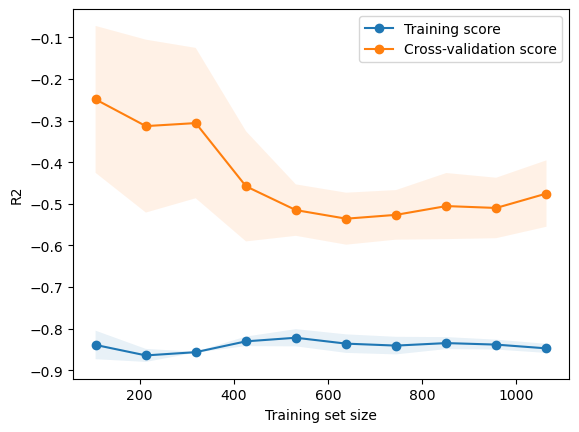

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Calculez les courbes d'apprentissage avec différentes tailles de jeu d'entraînement
train_sizes, train_scores, val_scores = learning_curve(vr, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, random_state=42, scoring='r2')

# Calculez les scores moyens et les écart-types
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Tracez les courbes d'apprentissage
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('R2')
plt.legend(loc='best')
plt.show()

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instancier les modèles individuels
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=42)
r3 = KNeighborsRegressor()

# Créer l'objet VotingRegressor
vr = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])

# Entraîner le modèle VotingRegressor sur les données d'entraînement
vr.fit(X_train, y_train)

# Calculer le score R2 sur les données de test
score = vr.score(X_test, y_test)

# Appliquez la validation croisée k-fold avec k=5 (5 plis)
scores = cross_val_score(vr, X_train, y_train, cv=10)
print("Scores de validation croisée :", scores)

# Affichez la moyenne des scores de validation croisée
print("Score moyen de validation croisée :", scores.mean())
print('Coeff R2 =', vr.score(X_test, y_test))

# Calculer et afficher les prédictions du modèle sur les données de test
predictions = vr.predict(X_test)

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Scores de validation croisée : [0.63384976 0.56224129 0.3495974  0.68602977 0.61550044 0.71387598
 0.85436668 0.35911002 0.61447736 0.3661294 ]
Score moyen de validation croisée : 0.5755178097377115
Coeff R2 = 0.7965527309605975


In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor

# Instancier les modèles individuels
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=42)
r3 = KNeighborsRegressor()

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'r2'

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'weights': [[1, 2, 3], [2, 3, 1], [3, 1, 2]]}

# Créer l'objet VotingRegressor avec recherche d'hyperparamètre par validation croisée
vr = VotingRegressor(estimators=[('lr', r1), ('rf', r2), ('r3', r3)])
grid_search = GridSearchCV(
    vr,
    param_grid,
    cv=5,
    scoring=score)



In [124]:
grid_search.fit(X_train, y_train)
#predictions = grid_search.predict(X_test)

# Optimiser ce classifieur sur le jeu d'entraînement
vr.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(vr.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")

for mean, std, params in zip(
        vr.cv_results_['mean_test_score'], # score moyen
        vr.cv_results_['std_test_score'],  # écart-type du score
        vr.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:


C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'VotingRegressor' object has no attribute 'best_params_'

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
from  sklearn import model_selection 

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_estimators':[10,20,30,40,100,200,300], 'learning_rate':[0.1,0.2,0.3], "max_depth" : [1,2,3,10]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'r2'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
GBR = model_selection.GridSearchCV(
    GradientBoostingRegressor(), # 
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

In [117]:
# Optimiser ce classifieur sur le jeu d'entraînement
GBR.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(GBR.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        GBR.cv_results_['mean_test_score'], # score moyen
        GBR.cv_results_['std_test_score'],  # écart-type du score
        GBR.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 200}
Résultats de la validation croisée :
r2 = 0.087 (+/-0.097) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}
r2 = 0.169 (+/-0.154) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 20}
r2 = 0.234 (+/-0.178) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 30}
r2 = 0.300 (+/-0.205) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 40}
r2 = 0.433 (+/-0.335) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
r2 = 0.500 (+/-0.319) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}
r2 = 0.517 (+/-0.300) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}
r2 = 0.201 (+/-0.158) for {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10}
r2 = 0.311 (+/-0.216) for {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 20}
r2 = 0.359 (+/-0.248) for {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from  sklearn import model_selection 

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'r2'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
GBR = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=2)

# Entraîner le modèle VotingRegressor sur les données d'entraînement
GBR.fit(X_train, y_train)

# Calculer le score R2 sur les données de test
score = GBR.score(X_test, y_test)

# Appliquez la validation croisée k-fold avec k=5 (5 plis)
scores = cross_val_score(GBR, X_train, y_train, cv=5)
print("Scores de validation croisée :", scores)

# Affichez la moyenne des scores de validation croisée
print("Score moyen de validation croisée :", scores.mean())

# Afficher le score R2
print('Coeff R2 =', score)

# Calculer et afficher les prédictions du modèle sur les données de test
predictions = GBR.predict(X_test)

In [ ]:
from  sklearn import model_selection 
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Fixer les valeurs des hyperparamètres à tester / on peut donner les 2 paramètres ElasticNet(alpha = 1, l1_ratio = 0.5) :
# alpha est le coefficient global du terme de régularisation (plus il est élevé, plus la pénalité est forte)
# l1_ratio est la pondération entre 0 et 1 affectée à L1 (1 - l1_ratio affectée à L2)

param_grid = {
                'alpha'     : [0.1,1,10,0.01],
                'l1_ratio'  :  np.arange(0.40,1.00,0.10),
                'tol'       : [0.0001,0.001]
            }

# Choisir un score à optimiser, ici le R2 (proportion de prédictions correctes)
score = 'r2'

# Créer une régression ElasticNet avec recherche d'hyperparamètre par validation croisée
eNet = ElasticNet(max_iter=10000)

ELN = GridSearchCV(eNet, # combine une régularisation de type L2 (ridge regression) avec une régularisation de type L1 (LASSO)
                           param_grid,  # hyperparamètres à tester 
                           scoring='r2', # score à optimiser
                           cv = 5,  # nombre de folds de validation croisée
                          )

# return_train_score=True,
#                           n_jobs = -1

In [ ]:
# Optimiser ce classifieur sur le jeu d'entraînement
ELN.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(ELN.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        ELN.cv_results_['mean_test_score'], # score moyen
        ELN.cv_results_['std_test_score'],  # écart-type du score
        ELN.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

In [ ]:
from  sklearn import model_selection 
from sklearn.linear_model import ElasticNet

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'r2'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
ELN = ElasticNet(max_iter=10000, alpha= 0.01, l1_ratio= 0.7999999999999999, tol= 0.0001)

# Entraîner le modèle VotingRegressor sur les données d'entraînement
ELN.fit(X_train, y_train)

# Calculer le score R2 sur les données de test
score = ELN.score(X_test, y_test)

# Appliquez la validation croisée k-fold avec k=5 (5 plis)
scores = cross_val_score(ELN, X_train, y_train, cv=5)
print("Scores de validation croisée :", scores)

# Affichez la moyenne des scores de validation croisée
print("Score moyen de validation croisée :", scores.mean())

# Afficher le score R2
print('Coeff R2 =', score)

# Calculer et afficher les prédictions du modèle sur les données de test
predictions = GBR.predict(X_test)

In [ ]:
hp = no_resid[no_resid["PrimaryPropertyType"] == 'Hospital'] 
hp
#PrimaryPropertyType[T.Hospital]

In [ ]:
hp = no_resid[no_resid["LargestPropertyUseType"] == 'Urgent Care/Clinic/Other Outpatient'] 
hp

In [ ]:
# SecondLargestPropertyUseType[T.Data Center] 
dc = no_resid[no_resid["LargestPropertyUseType"] == 'Data Center'] 
dc

In [ ]:
# Filtrer les variables où P>|t| est inférieur à 0,05
filtered_vars = []
for line in reg_multi.summary('\n'):
    if "P>|t|" in line:
        var_name = line.split()[0]
        p_value = float(line.summary()[4])
        if p_value < 0.05:
            filtered_vars.append(var_name)

In [ ]:
no_resid

### Test de corrélation : sexe et nombre d'achats

In [ ]:
import matplotlib.pyplot as plt

plt.plot(no_resid["SiteEUI(kBtu/sf)"],no_resid["PropertyGFABuilding(s)"],'o')
plt.xlabel("Age")
plt.ylabel("ca")
plt.grid()
plt.title('Répartition du CA par âge')
plt.show()

In [ ]:
plt.boxplot(no_resid['PropertyGFABuilding(s)'])

In [ ]:
# Supprimer toutes les marques avec un échantillon de moins de 500 produits
ind5 = no_resid[no_resid["PropertyGFABuilding(s)"] >2500000].index
no_resid.drop(ind5, inplace = True)

In [ ]:
# On va créer 8 intervalles de GFA :

labels = ['0-10000','10001-10500','10501-20000','20001-30000','30001-2500000']

no_resid['PropertyGFABuilding(s)_tranche']= pd.cut(no_resid['PropertyGFABuildings'], 5,labels=labels)
no_resid.head(50)

In [ ]:
fig = plt.figure(1, figsize=(20,6))
sns.boxplot(x='PropertyGFABuilding(s)_tranche',y='SiteEUI(kBtu/sf)',data=no_resid, showfliers=True)
plt.title("Emissions de CO2 annuelles (site divisée par sa surface au plancher) en fonction du nombre d'étages")
plt.grid()
plt.show()

In [ ]:
# On va créer 23 intervalles d'âges :

labels = ['1900-1904','1905-1909','1910-1914','1915-1919','1920-1924','1925-1929','1930-1934','1935-1939','1940-1944','1945-1949','1950-1954','1955-1959','1960-1964','1965-1969','1970-1974','1975-1979','1980-1984','1985-1989','1990-1994','1995-1999','2000-2004','2005-2009','2010-2015']

no_resid['YearBuilt_tranche']= pd.cut(no_resid['YearBuilt'], 23,labels=labels)
no_resid

In [ ]:
fig = plt.figure(1, figsize=(20,6))
sns.boxplot(x='YearBuilt_tranche',y='SiteEUI(kBtu/sf)',data=no_resid, showfliers=True)
plt.title("Emissions de CO2 annuelles (site divisée par sa surface au plancher) en fonction du nombre d'étages")
plt.grid()
plt.show()

In [ ]:
# Définir les plages pour l'histogramme
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]

# Créer un histogramme du nombre de propriétés dans chaque plage de surface
plt.hist(no_resid["PropertyGFABuilding(s)"], bins=bins, edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel("Surface des propriétés (m²)")
plt.ylabel("Nombre de propriétés")
plt.title("Distribution de la surface des propriétés")

# Afficher l'histogramme
plt.show()

In [ ]:
no_resid.describe(include = 'all')

In [ ]:
tranche = (2015-1900) /5
tranche

In [ ]:
no_resid.groupby("YearBuilt")["SiteEUI(kBtu/sf)"].mean().plot()

In [ ]:
no_resid.groupby("YearBuilt").GHGEmissionsIntensity.mean().plot()

In [ ]:
# Calculer la moyenne des émissions de CO2 par année de construction
mean_emissions_by_year = no_resid.groupby(["YearBuilt",'Neighborhood'] ).GHGEmissionsIntensity.mean()

# Créer une nouvelle figure avec une taille personnalisée
plt.figure(figsize=(15, 15))  # Ajustez les dimensions selon vos préférences (largeur, hauteur en pouces)

# Tracer le graphique en utilisant un diagramme en barres
mean_emissions_by_year.plot(kind="bar")

# Ajouter des titres et des labels
plt.title("Émission de CO2 par année de construction")
plt.ylabel("Quantité de Gaz à effet de serre en kg/m²")
plt.xlabel("Année de construction")

# Afficher le graphique
plt.show()